from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/BODC')


In [6]:
!ls data

LocationA.csv  LocationB.csv  LocationC.csv  LocationD.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 15:23:50.908132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 15:23:51.084408: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 15:23:51.092882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 15:23:51.092913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [8]:
epochs = 50

In [9]:
df = pd.read_csv("data/LocationC.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
BODC = df["BODC"]

X1, y1 = df_to_X_y(BODC, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 15:23:53.486998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 15:23:53.487067: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 15:23:53.487098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 15:23:53.487684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 4s - loss: 1866.8612 - root_mean_squared_error: 43.2072

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 114ms/step - loss: 1544.9993 - root_mean_squared_error: 39.3065 - val_loss: 1579.9375 - val_root_mean_squared_error: 39.7484
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1283.7842 - root_mean_squared_error: 35.8299

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 78ms/step - loss: 1455.0441 - root_mean_squared_error: 38.1450 - val_loss: 1487.6902 - val_root_mean_squared_error: 38.5706
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1355.9104 - root_mean_squared_error: 36.8227

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 69ms/step - loss: 1369.3132 - root_mean_squared_error: 37.0042 - val_loss: 1398.3925 - val_root_mean_squared_error: 37.3951
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1334.2402 - root_mean_squared_error: 36.5273

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 78ms/step - loss: 1286.9896 - root_mean_squared_error: 35.8746 - val_loss: 1312.1801 - val_root_mean_squared_error: 36.2240
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1380.7979 - root_mean_squared_error: 37.1591

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 1207.5337 - root_mean_squared_error: 34.7496 - val_loss: 1230.2139 - val_root_mean_squared_error: 35.0744
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 971.1446 - root_mean_squared_error: 31.1632

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 109ms/step - loss: 1130.8922 - root_mean_squared_error: 33.6287 - val_loss: 1152.5328 - val_root_mean_squared_error: 33.9490
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1001.7529 - root_mean_squared_error: 31.6505

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 133ms/step - loss: 1059.7421 - root_mean_squared_error: 32.5537 - val_loss: 1078.0261 - val_root_mean_squared_error: 32.8333
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 1031.9045 - root_mean_squared_error: 32.1233

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 95ms/step - loss: 991.6976 - root_mean_squared_error: 31.4912 - val_loss: 1007.8212 - val_root_mean_squared_error: 31.7462
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 882.5245 - root_mean_squared_error: 29.7073

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 926.7177 - root_mean_squared_error: 30.4420 - val_loss: 941.1124 - val_root_mean_squared_error: 30.6776
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 956.6261 - root_mean_squared_error: 30.9294

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 108ms/step - loss: 865.7711 - root_mean_squared_error: 29.4240 - val_loss: 877.3576 - val_root_mean_squared_error: 29.6202
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 864.5582 - root_mean_squared_error: 29.4034

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 95ms/step - loss: 807.0681 - root_mean_squared_error: 28.4089 - val_loss: 817.6282 - val_root_mean_squared_error: 28.5942
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 758.4180 - root_mean_squared_error: 27.5394

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 751.7777 - root_mean_squared_error: 27.4186 - val_loss: 760.0833 - val_root_mean_squared_error: 27.5696
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 715.5500 - root_mean_squared_error: 26.7498

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 698.4614 - root_mean_squared_error: 26.4284 - val_loss: 705.3918 - val_root_mean_squared_error: 26.5592
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 633.9775 - root_mean_squared_error: 25.1789

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 118ms/step - loss: 647.7320 - root_mean_squared_error: 25.4506 - val_loss: 653.4076 - val_root_mean_squared_error: 25.5618
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 652.8773 - root_mean_squared_error: 25.5515

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 599.8303 - root_mean_squared_error: 24.4914 - val_loss: 604.0964 - val_root_mean_squared_error: 24.5784
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 564.5961 - root_mean_squared_error: 23.7612

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 83ms/step - loss: 554.5519 - root_mean_squared_error: 23.5489 - val_loss: 557.4519 - val_root_mean_squared_error: 23.6104
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 565.7379 - root_mean_squared_error: 23.7852

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 87ms/step - loss: 512.0157 - root_mean_squared_error: 22.6278 - val_loss: 514.2896 - val_root_mean_squared_error: 22.6780
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 482.4666 - root_mean_squared_error: 21.9651

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 92ms/step - loss: 475.7376 - root_mean_squared_error: 21.8114 - val_loss: 483.3868 - val_root_mean_squared_error: 21.9861
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 428.1168 - root_mean_squared_error: 20.6910

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 90ms/step - loss: 447.7328 - root_mean_squared_error: 21.1597 - val_loss: 454.1059 - val_root_mean_squared_error: 21.3098
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 401.9037 - root_mean_squared_error: 20.0475

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 94ms/step - loss: 420.0356 - root_mean_squared_error: 20.4948 - val_loss: 425.6566 - val_root_mean_squared_error: 20.6314
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 433.4419 - root_mean_squared_error: 20.8193

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 98ms/step - loss: 393.9855 - root_mean_squared_error: 19.8491 - val_loss: 398.1021 - val_root_mean_squared_error: 19.9525
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 386.8274 - root_mean_squared_error: 19.6679

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 100ms/step - loss: 368.6165 - root_mean_squared_error: 19.1994 - val_loss: 372.2867 - val_root_mean_squared_error: 19.2947
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 385.7967 - root_mean_squared_error: 19.6417

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 119ms/step - loss: 344.5076 - root_mean_squared_error: 18.5609 - val_loss: 347.4651 - val_root_mean_squared_error: 18.6404
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 339.4548 - root_mean_squared_error: 18.4243

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 84ms/step - loss: 321.3492 - root_mean_squared_error: 17.9262 - val_loss: 323.6810 - val_root_mean_squared_error: 17.9911
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 284.3579 - root_mean_squared_error: 16.8629

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 88ms/step - loss: 299.4447 - root_mean_squared_error: 17.3045 - val_loss: 301.1412 - val_root_mean_squared_error: 17.3534
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 274.8986 - root_mean_squared_error: 16.5801

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 278.6421 - root_mean_squared_error: 16.6926 - val_loss: 280.0044 - val_root_mean_squared_error: 16.7333
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 274.4912 - root_mean_squared_error: 16.5678

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 98ms/step - loss: 259.1875 - root_mean_squared_error: 16.0993 - val_loss: 259.7467 - val_root_mean_squared_error: 16.1167
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 263.9832 - root_mean_squared_error: 16.2476

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 114ms/step - loss: 240.5779 - root_mean_squared_error: 15.5106 - val_loss: 240.7552 - val_root_mean_squared_error: 15.5163
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 240.1620 - root_mean_squared_error: 15.4972

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 138ms/step - loss: 222.9989 - root_mean_squared_error: 14.9331 - val_loss: 222.7841 - val_root_mean_squared_error: 14.9260
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 191.1129 - root_mean_squared_error: 13.8244

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 206.3785 - root_mean_squared_error: 14.3659 - val_loss: 205.8908 - val_root_mean_squared_error: 14.3489
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 202.2647 - root_mean_squared_error: 14.2220

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 268ms/step - loss: 190.7772 - root_mean_squared_error: 13.8122 - val_loss: 190.0313 - val_root_mean_squared_error: 13.7852
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 176.5046 - root_mean_squared_error: 13.2855

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 160ms/step - loss: 175.9962 - root_mean_squared_error: 13.2664 - val_loss: 175.1131 - val_root_mean_squared_error: 13.2330
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 196.7193 - root_mean_squared_error: 14.0257

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 230ms/step - loss: 162.1925 - root_mean_squared_error: 12.7355 - val_loss: 160.7141 - val_root_mean_squared_error: 12.6773
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 152.1402 - root_mean_squared_error: 12.3345

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 165ms/step - loss: 148.8662 - root_mean_squared_error: 12.2011 - val_loss: 147.1769 - val_root_mean_squared_error: 12.1316
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 142.1851 - root_mean_squared_error: 11.9241

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 141ms/step - loss: 136.4161 - root_mean_squared_error: 11.6797 - val_loss: 134.6111 - val_root_mean_squared_error: 11.6022
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 135.6930 - root_mean_squared_error: 11.6487

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 190ms/step - loss: 124.9870 - root_mean_squared_error: 11.1798 - val_loss: 123.4224 - val_root_mean_squared_error: 11.1096
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 125.6573 - root_mean_squared_error: 11.2097

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 159ms/step - loss: 115.1334 - root_mean_squared_error: 10.7300 - val_loss: 114.2230 - val_root_mean_squared_error: 10.6875
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 100.7394 - root_mean_squared_error: 10.0369

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 106.7245 - root_mean_squared_error: 10.3308 - val_loss: 105.8186 - val_root_mean_squared_error: 10.2868
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 101.5251 - root_mean_squared_error: 10.0760

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 140ms/step - loss: 98.9416 - root_mean_squared_error: 9.9469 - val_loss: 97.8200 - val_root_mean_squared_error: 9.8904
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 83.9642 - root_mean_squared_error: 9.1632

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 173ms/step - loss: 91.5409 - root_mean_squared_error: 9.5677 - val_loss: 90.2942 - val_root_mean_squared_error: 9.5023
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 93.7133 - root_mean_squared_error: 9.6806

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 108ms/step - loss: 84.5434 - root_mean_squared_error: 9.1947 - val_loss: 83.1446 - val_root_mean_squared_error: 9.1184
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 78.9327 - root_mean_squared_error: 8.8844

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 77.9134 - root_mean_squared_error: 8.8269 - val_loss: 76.5124 - val_root_mean_squared_error: 8.7471
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 68.6389 - root_mean_squared_error: 8.2849

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 153ms/step - loss: 71.7375 - root_mean_squared_error: 8.4698 - val_loss: 70.2443 - val_root_mean_squared_error: 8.3812
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 66.0179 - root_mean_squared_error: 8.1251

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 158ms/step - loss: 65.9725 - root_mean_squared_error: 8.1223 - val_loss: 64.4230 - val_root_mean_squared_error: 8.0264
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 63.7362 - root_mean_squared_error: 7.9835

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 162ms/step - loss: 60.5459 - root_mean_squared_error: 7.7811 - val_loss: 58.9922 - val_root_mean_squared_error: 7.6806
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 62.3518 - root_mean_squared_error: 7.8963

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 120ms/step - loss: 55.5352 - root_mean_squared_error: 7.4522 - val_loss: 53.9205 - val_root_mean_squared_error: 7.3431
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 47.4806 - root_mean_squared_error: 6.8906

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 125ms/step - loss: 50.7878 - root_mean_squared_error: 7.1266 - val_loss: 49.2296 - val_root_mean_squared_error: 7.0164
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 43.4524 - root_mean_squared_error: 6.5918

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 141ms/step - loss: 46.4333 - root_mean_squared_error: 6.8142 - val_loss: 44.8707 - val_root_mean_squared_error: 6.6986
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 44.5935 - root_mean_squared_error: 6.6778

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 114ms/step - loss: 42.4070 - root_mean_squared_error: 6.5121 - val_loss: 40.8178 - val_root_mean_squared_error: 6.3889
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 37.2119 - root_mean_squared_error: 6.1002

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 3ms/step


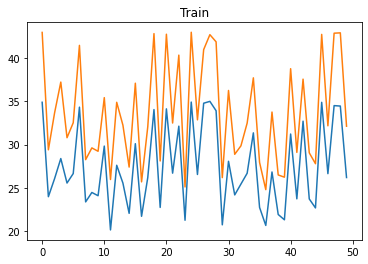

2/2 [==============================] - 0s 3ms/step


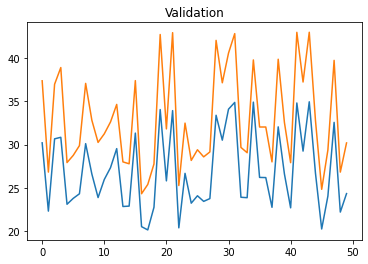

3/3 [==============================] - 0s 3ms/step


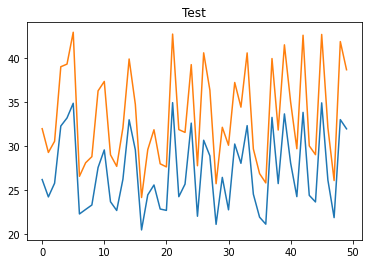

3/3 [==============================] - 0s 3ms/step


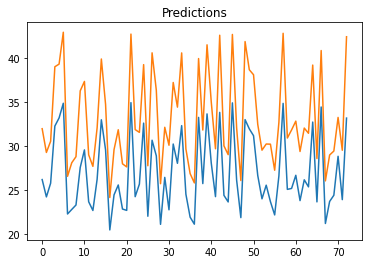

In [10]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
1/8 [==>...........................] - ETA: 19s - loss: 1140.7997 - root_mean_squared_error: 33.7757

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 696ms/step - loss: 1089.4110 - root_mean_squared_error: 33.0062 - val_loss: 1149.4952 - val_root_mean_squared_error: 33.9042
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1089.4445 - root_mean_squared_error: 33.0067

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 583ms/step - loss: 1080.5947 - root_mean_squared_error: 32.8724 - val_loss: 1140.5295 - val_root_mean_squared_error: 33.7717
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1111.2123 - root_mean_squared_error: 33.3349

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 599ms/step - loss: 1071.8142 - root_mean_squared_error: 32.7386 - val_loss: 1131.5685 - val_root_mean_squared_error: 33.6388
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 1060.3270 - root_mean_squared_error: 32.5627

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 650ms/step - loss: 1063.0060 - root_mean_squared_error: 32.6038 - val_loss: 1122.6084 - val_root_mean_squared_error: 33.5053
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1054.2583 - root_mean_squared_error: 32.4693

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 684ms/step - loss: 1054.2583 - root_mean_squared_error: 32.4693 - val_loss: 1113.6428 - val_root_mean_squared_error: 33.3713
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1038.7529 - root_mean_squared_error: 32.2297

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 635ms/step - loss: 1045.4318 - root_mean_squared_error: 32.3331 - val_loss: 1104.6700 - val_root_mean_squared_error: 33.2366
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1156.7878 - root_mean_squared_error: 34.0116

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 734ms/step - loss: 1036.6167 - root_mean_squared_error: 32.1965 - val_loss: 1095.6190 - val_root_mean_squared_error: 33.1001
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1027.7128 - root_mean_squared_error: 32.0580

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 785ms/step - loss: 1027.7128 - root_mean_squared_error: 32.0580 - val_loss: 1086.4996 - val_root_mean_squared_error: 32.9621
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 1018.7507 - root_mean_squared_error: 31.9179

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 834ms/step - loss: 1018.7507 - root_mean_squared_error: 31.9179 - val_loss: 1077.2825 - val_root_mean_squared_error: 32.8220
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 971.9114 - root_mean_squared_error: 31.1755

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 849ms/step - loss: 1009.6720 - root_mean_squared_error: 31.7753 - val_loss: 1067.9530 - val_root_mean_squared_error: 32.6796
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 1000.5006 - root_mean_squared_error: 31.6307

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 797ms/step - loss: 1000.5006 - root_mean_squared_error: 31.6307 - val_loss: 1058.5054 - val_root_mean_squared_error: 32.5347
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 991.1788 - root_mean_squared_error: 31.4830

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 867ms/step - loss: 991.1788 - root_mean_squared_error: 31.4830 - val_loss: 1048.9572 - val_root_mean_squared_error: 32.3876
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 981.8020 - root_mean_squared_error: 31.3337

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 905ms/step - loss: 981.8020 - root_mean_squared_error: 31.3337 - val_loss: 1039.2415 - val_root_mean_squared_error: 32.2373
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 972.1929 - root_mean_squared_error: 31.1800

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 785ms/step - loss: 972.1929 - root_mean_squared_error: 31.1800 - val_loss: 1029.3356 - val_root_mean_squared_error: 32.0833
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 984.7989 - root_mean_squared_error: 31.3815

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 831ms/step - loss: 962.4457 - root_mean_squared_error: 31.0233 - val_loss: 1019.2079 - val_root_mean_squared_error: 31.9250
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 876.5670 - root_mean_squared_error: 29.6069

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 754ms/step - loss: 952.4544 - root_mean_squared_error: 30.8619 - val_loss: 1008.9418 - val_root_mean_squared_error: 31.7638
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 828.4015 - root_mean_squared_error: 28.7820

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 911ms/step - loss: 942.3404 - root_mean_squared_error: 30.6976 - val_loss: 998.4562 - val_root_mean_squared_error: 31.5984
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 991.8392 - root_mean_squared_error: 31.4935

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 888ms/step - loss: 932.0817 - root_mean_squared_error: 30.5300 - val_loss: 987.7751 - val_root_mean_squared_error: 31.4289
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1007.3920 - root_mean_squared_error: 31.7394

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 830ms/step - loss: 921.6362 - root_mean_squared_error: 30.3585 - val_loss: 977.0084 - val_root_mean_squared_error: 31.2571
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 920.2160 - root_mean_squared_error: 30.3351

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 811ms/step - loss: 911.1295 - root_mean_squared_error: 30.1849 - val_loss: 966.1234 - val_root_mean_squared_error: 31.0825
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 945.9846 - root_mean_squared_error: 30.7569

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 866ms/step - loss: 900.4977 - root_mean_squared_error: 30.0083 - val_loss: 955.1347 - val_root_mean_squared_error: 30.9053
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 953.3540 - root_mean_squared_error: 30.8764

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 852ms/step - loss: 889.7150 - root_mean_squared_error: 29.8281 - val_loss: 944.0144 - val_root_mean_squared_error: 30.7248
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 885.2985 - root_mean_squared_error: 29.7540

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 914ms/step - loss: 878.8329 - root_mean_squared_error: 29.6451 - val_loss: 932.7524 - val_root_mean_squared_error: 30.5410
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 859.7474 - root_mean_squared_error: 29.3214

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 886ms/step - loss: 867.8521 - root_mean_squared_error: 29.4593 - val_loss: 921.3540 - val_root_mean_squared_error: 30.3538
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 812.0792 - root_mean_squared_error: 28.4970

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 743ms/step - loss: 856.7673 - root_mean_squared_error: 29.2706 - val_loss: 909.8904 - val_root_mean_squared_error: 30.1644
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 807.2115 - root_mean_squared_error: 28.4115

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 745ms/step - loss: 845.6121 - root_mean_squared_error: 29.0794 - val_loss: 898.3528 - val_root_mean_squared_error: 29.9725
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 813.6306 - root_mean_squared_error: 28.5242

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 860ms/step - loss: 834.3514 - root_mean_squared_error: 28.8851 - val_loss: 886.7303 - val_root_mean_squared_error: 29.7780
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 989.1060 - root_mean_squared_error: 31.4501

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 744ms/step - loss: 823.1904 - root_mean_squared_error: 28.6913 - val_loss: 875.0591 - val_root_mean_squared_error: 29.5814
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 833.1810 - root_mean_squared_error: 28.8649

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 805ms/step - loss: 811.8895 - root_mean_squared_error: 28.4937 - val_loss: 863.4431 - val_root_mean_squared_error: 29.3844
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 857.9509 - root_mean_squared_error: 29.2908

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 742ms/step - loss: 800.6734 - root_mean_squared_error: 28.2962 - val_loss: 851.7873 - val_root_mean_squared_error: 29.1854
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 789.3682 - root_mean_squared_error: 28.0957

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 847ms/step - loss: 789.3682 - root_mean_squared_error: 28.0957 - val_loss: 840.1547 - val_root_mean_squared_error: 28.9854
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 778.1332 - root_mean_squared_error: 27.8950

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 894ms/step - loss: 778.1332 - root_mean_squared_error: 27.8950 - val_loss: 828.4761 - val_root_mean_squared_error: 28.7833
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 762.8793 - root_mean_squared_error: 27.6203

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 773ms/step - loss: 766.8474 - root_mean_squared_error: 27.6920 - val_loss: 816.7621 - val_root_mean_squared_error: 28.5791
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 725.2577 - root_mean_squared_error: 26.9306

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 838ms/step - loss: 755.4865 - root_mean_squared_error: 27.4861 - val_loss: 805.0444 - val_root_mean_squared_error: 28.3733
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 675.7913 - root_mean_squared_error: 25.9960

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 858ms/step - loss: 744.1837 - root_mean_squared_error: 27.2797 - val_loss: 793.3510 - val_root_mean_squared_error: 28.1665
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 825.7448 - root_mean_squared_error: 28.7358

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 751ms/step - loss: 732.9967 - root_mean_squared_error: 27.0739 - val_loss: 781.6671 - val_root_mean_squared_error: 27.9583
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 736.6685 - root_mean_squared_error: 27.1416

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 869ms/step - loss: 721.7386 - root_mean_squared_error: 26.8652 - val_loss: 770.1910 - val_root_mean_squared_error: 27.7523
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 675.6367 - root_mean_squared_error: 25.9930

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 787ms/step - loss: 710.7985 - root_mean_squared_error: 26.6608 - val_loss: 758.8790 - val_root_mean_squared_error: 27.5478
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 698.0796 - root_mean_squared_error: 26.4212

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 828ms/step - loss: 700.0142 - root_mean_squared_error: 26.4578 - val_loss: 747.8540 - val_root_mean_squared_error: 27.3469
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 716.4266 - root_mean_squared_error: 26.7661

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 784ms/step - loss: 689.4256 - root_mean_squared_error: 26.2569 - val_loss: 736.9727 - val_root_mean_squared_error: 27.1472
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 674.5315 - root_mean_squared_error: 25.9717

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 880ms/step - loss: 679.0262 - root_mean_squared_error: 26.0581 - val_loss: 726.3333 - val_root_mean_squared_error: 26.9506
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 622.4718 - root_mean_squared_error: 24.9494

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 752ms/step - loss: 668.8767 - root_mean_squared_error: 25.8626 - val_loss: 715.8828 - val_root_mean_squared_error: 26.7560
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 708.5482 - root_mean_squared_error: 26.6186

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 854ms/step - loss: 658.9431 - root_mean_squared_error: 25.6699 - val_loss: 705.6967 - val_root_mean_squared_error: 26.5650
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 722.4277 - root_mean_squared_error: 26.8780

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 722ms/step - loss: 649.2783 - root_mean_squared_error: 25.4809 - val_loss: 695.7065 - val_root_mean_squared_error: 26.3762
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 617.2048 - root_mean_squared_error: 24.8436

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 641ms/step - loss: 639.7165 - root_mean_squared_error: 25.2926 - val_loss: 685.8748 - val_root_mean_squared_error: 26.1892
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 641.9136 - root_mean_squared_error: 25.3360

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 6s 844ms/step - loss: 630.3752 - root_mean_squared_error: 25.1073 - val_loss: 676.1933 - val_root_mean_squared_error: 26.0037
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 617.3459 - root_mean_squared_error: 24.8464

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 5s 690ms/step - loss: 621.0862 - root_mean_squared_error: 24.9216 - val_loss: 666.7509 - val_root_mean_squared_error: 25.8215
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 611.7004 - root_mean_squared_error: 24.7326

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 601ms/step - loss: 612.2212 - root_mean_squared_error: 24.7431 - val_loss: 657.4056 - val_root_mean_squared_error: 25.6399
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 607.0880 - root_mean_squared_error: 24.6392

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 4s 588ms/step - loss: 603.4052 - root_mean_squared_error: 24.5643 - val_loss: 648.3383 - val_root_mean_squared_error: 25.4625
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 566.4768 - root_mean_squared_error: 23.8008

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 1s 3ms/step


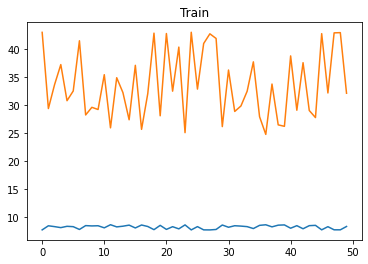

2/2 [==============================] - 1s 10ms/step


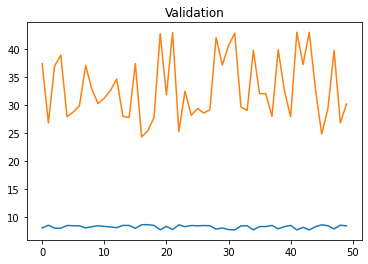

3/3 [==============================] - 0s 4ms/step


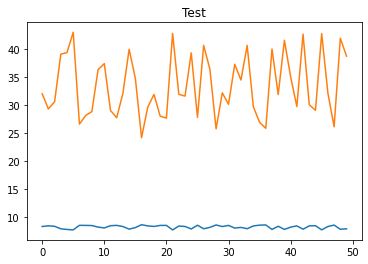

3/3 [==============================] - 0s 5ms/step


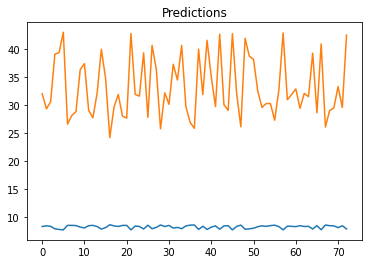

In [11]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
1/8 [==>...........................] - ETA: 22s - loss: 1131.1367 - root_mean_squared_error: 33.6324

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 1s/step - loss: 1044.8833 - root_mean_squared_error: 32.3247 - val_loss: 1105.5752 - val_root_mean_squared_error: 33.2502
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1041.1909 - root_mean_squared_error: 32.2675

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 967ms/step - loss: 1041.1909 - root_mean_squared_error: 32.2675 - val_loss: 1101.8578 - val_root_mean_squared_error: 33.1942
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 1025.6978 - root_mean_squared_error: 32.0265

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 858ms/step - loss: 1037.5051 - root_mean_squared_error: 32.2103 - val_loss: 1098.1328 - val_root_mean_squared_error: 33.1381
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1033.8191 - root_mean_squared_error: 32.1531

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 983ms/step - loss: 1033.8191 - root_mean_squared_error: 32.1531 - val_loss: 1094.3972 - val_root_mean_squared_error: 33.0817
Epoch 5/50
4/8 [==============>...............] - ETA: 0s - loss: 1004.0417 - root_mean_squared_error: 31.6866

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 906ms/step - loss: 1030.1079 - root_mean_squared_error: 32.0953 - val_loss: 1090.5997 - val_root_mean_squared_error: 33.0242
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1033.1294 - root_mean_squared_error: 32.1423

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 975ms/step - loss: 1026.3497 - root_mean_squared_error: 32.0367 - val_loss: 1086.7296 - val_root_mean_squared_error: 32.9656
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 1015.3666 - root_mean_squared_error: 31.8648

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 881ms/step - loss: 1022.5039 - root_mean_squared_error: 31.9766 - val_loss: 1082.7666 - val_root_mean_squared_error: 32.9054
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 1112.9758 - root_mean_squared_error: 33.3613

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 1018.5911 - root_mean_squared_error: 31.9154 - val_loss: 1078.7301 - val_root_mean_squared_error: 32.8440
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1009.7716 - root_mean_squared_error: 31.7769

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1014.8819 - root_mean_squared_error: 31.8572 - val_loss: 1075.7268 - val_root_mean_squared_error: 32.7983
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 1016.0721 - root_mean_squared_error: 31.8759

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1012.6149 - root_mean_squared_error: 31.8216 - val_loss: 1073.6768 - val_root_mean_squared_error: 32.7670
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 1010.6060 - root_mean_squared_error: 31.7900

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 1010.6060 - root_mean_squared_error: 31.7900 - val_loss: 1071.5585 - val_root_mean_squared_error: 32.7347
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 1007.8900 - root_mean_squared_error: 31.7473

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1008.4893 - root_mean_squared_error: 31.7567 - val_loss: 1069.3467 - val_root_mean_squared_error: 32.7009
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 988.4238 - root_mean_squared_error: 31.4392

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1006.2861 - root_mean_squared_error: 31.7220 - val_loss: 1067.0746 - val_root_mean_squared_error: 32.6661
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 952.3029 - root_mean_squared_error: 30.8594

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 1004.0352 - root_mean_squared_error: 31.6865 - val_loss: 1064.7406 - val_root_mean_squared_error: 32.6304
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 993.8820 - root_mean_squared_error: 31.5259 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 1001.7224 - root_mean_squared_error: 31.6500 - val_loss: 1062.3689 - val_root_mean_squared_error: 32.5940
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 1102.7222 - root_mean_squared_error: 33.2073

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 944ms/step - loss: 999.3700 - root_mean_squared_error: 31.6128 - val_loss: 1059.9430 - val_root_mean_squared_error: 32.5568
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 989.1066 - root_mean_squared_error: 31.4501

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 996.9473 - root_mean_squared_error: 31.5745 - val_loss: 1057.4391 - val_root_mean_squared_error: 32.5183
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 999.1061 - root_mean_squared_error: 31.6086

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 994.4512 - root_mean_squared_error: 31.5349 - val_loss: 1054.8322 - val_root_mean_squared_error: 32.4782
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 990.0985 - root_mean_squared_error: 31.4658 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 991.8599 - root_mean_squared_error: 31.4938 - val_loss: 1052.1396 - val_root_mean_squared_error: 32.4367
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 989.1740 - root_mean_squared_error: 31.4511 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 966ms/step - loss: 989.1740 - root_mean_squared_error: 31.4511 - val_loss: 1049.3506 - val_root_mean_squared_error: 32.3937
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 1010.1065 - root_mean_squared_error: 31.7822

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 6s 926ms/step - loss: 986.3829 - root_mean_squared_error: 31.4067 - val_loss: 1046.4551 - val_root_mean_squared_error: 32.3490
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 945.6547 - root_mean_squared_error: 30.7515

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 983.4763 - root_mean_squared_error: 31.3604 - val_loss: 1043.4393 - val_root_mean_squared_error: 32.3023
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 980.4440 - root_mean_squared_error: 31.3120

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 992ms/step - loss: 980.4440 - root_mean_squared_error: 31.3120 - val_loss: 1040.2772 - val_root_mean_squared_error: 32.2533
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 1034.2386 - root_mean_squared_error: 32.1596

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 977.2635 - root_mean_squared_error: 31.2612 - val_loss: 1036.9508 - val_root_mean_squared_error: 32.2017
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 969.5076 - root_mean_squared_error: 31.1369

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 943ms/step - loss: 973.9056 - root_mean_squared_error: 31.2075 - val_loss: 1033.4465 - val_root_mean_squared_error: 32.1473
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 975.4670 - root_mean_squared_error: 31.2325

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 7s 1s/step - loss: 970.3742 - root_mean_squared_error: 31.1508 - val_loss: 1029.7413 - val_root_mean_squared_error: 32.0896
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 962.1611 - root_mean_squared_error: 31.0187

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 966.6302 - root_mean_squared_error: 31.0907 - val_loss: 1025.8302 - val_root_mean_squared_error: 32.0286
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 941.2339 - root_mean_squared_error: 30.6795

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 962.6755 - root_mean_squared_error: 31.0270 - val_loss: 1021.6940 - val_root_mean_squared_error: 31.9639
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 968.8073 - root_mean_squared_error: 31.1257 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 958.4827 - root_mean_squared_error: 30.9594 - val_loss: 1017.2950 - val_root_mean_squared_error: 31.8951
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 954.0129 - root_mean_squared_error: 30.8871

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 954.0129 - root_mean_squared_error: 30.8871 - val_loss: 1012.6138 - val_root_mean_squared_error: 31.8216
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 949.2626 - root_mean_squared_error: 30.8101

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 949.2626 - root_mean_squared_error: 30.8101 - val_loss: 1007.6152 - val_root_mean_squared_error: 31.7430
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 979.9792 - root_mean_squared_error: 31.3046

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 944.1929 - root_mean_squared_error: 30.7277 - val_loss: 1002.2786 - val_root_mean_squared_error: 31.6588
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 942.3032 - root_mean_squared_error: 30.6970

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 938.7733 - root_mean_squared_error: 30.6394 - val_loss: 996.6098 - val_root_mean_squared_error: 31.5691
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 853.4850 - root_mean_squared_error: 29.2145

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 933.0111 - root_mean_squared_error: 30.5452 - val_loss: 990.5441 - val_root_mean_squared_error: 31.4729
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 926.5433 - root_mean_squared_error: 30.4392

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 926.8482 - root_mean_squared_error: 30.4442 - val_loss: 984.0370 - val_root_mean_squared_error: 31.3694
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 917.3774 - root_mean_squared_error: 30.2882

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 919.3168 - root_mean_squared_error: 30.3202 - val_loss: 973.0764 - val_root_mean_squared_error: 31.1942
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 905.5106 - root_mean_squared_error: 30.0917

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 8s 1s/step - loss: 905.5106 - root_mean_squared_error: 30.0917 - val_loss: 956.0350 - val_root_mean_squared_error: 30.9198
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 891.3090 - root_mean_squared_error: 29.8548

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 888.2230 - root_mean_squared_error: 29.8031 - val_loss: 937.9061 - val_root_mean_squared_error: 30.6253
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 942.7434 - root_mean_squared_error: 30.7041

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 870.4617 - root_mean_squared_error: 29.5036 - val_loss: 919.7011 - val_root_mean_squared_error: 30.3266
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 849.5200 - root_mean_squared_error: 29.1465

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 852.7368 - root_mean_squared_error: 29.2017 - val_loss: 901.6234 - val_root_mean_squared_error: 30.0270
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 835.1126 - root_mean_squared_error: 28.8983

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 835.1126 - root_mean_squared_error: 28.8983 - val_loss: 883.7396 - val_root_mean_squared_error: 29.7278
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 864.0063 - root_mean_squared_error: 29.3940

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 817.8098 - root_mean_squared_error: 28.5974 - val_loss: 865.9806 - val_root_mean_squared_error: 29.4275
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 694.8409 - root_mean_squared_error: 26.3598

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 800.6341 - root_mean_squared_error: 28.2955 - val_loss: 848.3658 - val_root_mean_squared_error: 29.1267
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 828.9777 - root_mean_squared_error: 28.7920

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 783.6412 - root_mean_squared_error: 27.9936 - val_loss: 830.8797 - val_root_mean_squared_error: 28.8250
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 766.8075 - root_mean_squared_error: 27.6913

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 766.8075 - root_mean_squared_error: 27.6913 - val_loss: 813.5721 - val_root_mean_squared_error: 28.5232
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 747.5331 - root_mean_squared_error: 27.3411

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 750.0692 - root_mean_squared_error: 27.3874 - val_loss: 796.3495 - val_root_mean_squared_error: 28.2197
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 717.1859 - root_mean_squared_error: 26.7803

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 733.3807 - root_mean_squared_error: 27.0810 - val_loss: 779.0397 - val_root_mean_squared_error: 27.9113
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 801.5405 - root_mean_squared_error: 28.3115

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 716.7271 - root_mean_squared_error: 26.7718 - val_loss: 761.5981 - val_root_mean_squared_error: 27.5971
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 703.8459 - root_mean_squared_error: 26.5301

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 699.8871 - root_mean_squared_error: 26.4554 - val_loss: 744.2539 - val_root_mean_squared_error: 27.2810
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 785.1932 - root_mean_squared_error: 28.0213

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 1s 6ms/step


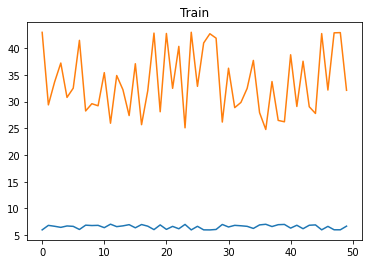

2/2 [==============================] - 2s 5ms/step


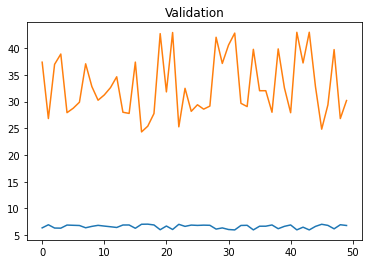

3/3 [==============================] - 0s 5ms/step


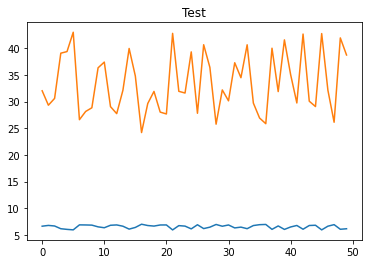

3/3 [==============================] - 0s 4ms/step


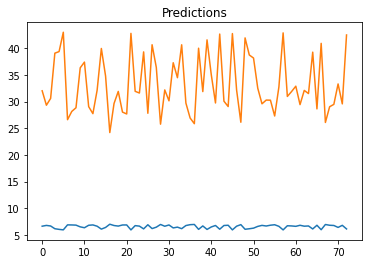

In [12]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
4/8 [==============>...............] - ETA: 0s - loss: 1177.6104 - root_mean_squared_error: 34.3163 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 694ms/step - loss: 1168.1228 - root_mean_squared_error: 34.1778 - val_loss: 1231.5107 - val_root_mean_squared_error: 35.0929
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1164.1412 - root_mean_squared_error: 34.1195INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 849ms/step - loss: 1162.9922 - root_mean_squared_error: 34.1027 - val_loss: 1226.2101 - val_root_mean_squared_error: 35.0173
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1157.7229 - root_mean_squared_error: 34.0253INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 536ms/step - loss: 1157.7229 - root_mean_squared_error: 34.0253 - val_loss: 1220.7263 - val_root_mean_squared_error: 34.9389
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1157.3624 - root_mean_squared_error: 34.0200INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 869ms/step - loss: 1152.2311 - root_mean_squared_error: 33.9445 - val_loss: 1214.9761 - val_root_mean_squared_error: 34.8565
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1141.9773 - root_mean_squared_error: 33.7932INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 719ms/step - loss: 1146.4459 - root_mean_squared_error: 33.8592 - val_loss: 1208.8617 - val_root_mean_squared_error: 34.7687
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 1140.2771 - root_mean_squared_error: 33.7680INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 1140.2771 - root_mean_squared_error: 33.7680 - val_loss: 1202.2621 - val_root_mean_squared_error: 34.6737
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 1200.2393 - root_mean_squared_error: 34.6445INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 1133.5773 - root_mean_squared_error: 33.6686 - val_loss: 1195.1063 - val_root_mean_squared_error: 34.5703
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 1111.4265 - root_mean_squared_error: 33.3381INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 753ms/step - loss: 1126.2798 - root_mean_squared_error: 33.5601 - val_loss: 1187.3153 - val_root_mean_squared_error: 34.4574
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 1111.8618 - root_mean_squared_error: 33.3446INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 1118.3690 - root_mean_squared_error: 33.4420 - val_loss: 1178.8419 - val_root_mean_squared_error: 34.3343
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 1099.8495 - root_mean_squared_error: 33.1640INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 1109.8048 - root_mean_squared_error: 33.3137 - val_loss: 1169.6993 - val_root_mean_squared_error: 34.2009
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 1123.7629 - root_mean_squared_error: 33.5226INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 611ms/step - loss: 1100.5991 - root_mean_squared_error: 33.1753 - val_loss: 1160.0013 - val_root_mean_squared_error: 34.0588
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 1090.8468 - root_mean_squared_error: 33.0280INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 1090.8468 - root_mean_squared_error: 33.0280 - val_loss: 1149.8220 - val_root_mean_squared_error: 33.9090
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1170.1194 - root_mean_squared_error: 34.2070INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 816ms/step - loss: 1080.7366 - root_mean_squared_error: 32.8746 - val_loss: 1139.3004 - val_root_mean_squared_error: 33.7535
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 1070.3038 - root_mean_squared_error: 32.7155INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 623ms/step - loss: 1070.3038 - root_mean_squared_error: 32.7155 - val_loss: 1128.5542 - val_root_mean_squared_error: 33.5940
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 1059.6962 - root_mean_squared_error: 32.5530INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 705ms/step - loss: 1059.6962 - root_mean_squared_error: 32.5530 - val_loss: 1117.7469 - val_root_mean_squared_error: 33.4327
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 1049.0022 - root_mean_squared_error: 32.3883INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 609ms/step - loss: 1049.0022 - root_mean_squared_error: 32.3883 - val_loss: 1106.8446 - val_root_mean_squared_error: 33.2693
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 1041.9471 - root_mean_squared_error: 32.2792INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 829ms/step - loss: 1038.1849 - root_mean_squared_error: 32.2209 - val_loss: 1095.8026 - val_root_mean_squared_error: 33.1029
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 1032.8563 - root_mean_squared_error: 32.1381INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 691ms/step - loss: 1027.1520 - root_mean_squared_error: 32.0492 - val_loss: 1084.5396 - val_root_mean_squared_error: 32.9323
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1023.4052 - root_mean_squared_error: 31.9907INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 596ms/step - loss: 1015.8502 - root_mean_squared_error: 31.8724 - val_loss: 1072.9308 - val_root_mean_squared_error: 32.7556
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 1060.7007 - root_mean_squared_error: 32.5684INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 1004.1295 - root_mean_squared_error: 31.6880 - val_loss: 1060.8804 - val_root_mean_squared_error: 32.5712
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 998.3568 - root_mean_squared_error: 31.5968INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 717ms/step - loss: 991.9468 - root_mean_squared_error: 31.4952 - val_loss: 1048.3187 - val_root_mean_squared_error: 32.3778
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 971.6379 - root_mean_squared_error: 31.1711INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 582ms/step - loss: 979.2675 - root_mean_squared_error: 31.2932 - val_loss: 1035.2582 - val_root_mean_squared_error: 32.1754
Epoch 23/50
4/8 [==============>...............] - ETA: 0s - loss: 990.9682 - root_mean_squared_error: 31.4796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 966.1636 - root_mean_squared_error: 31.0832 - val_loss: 1021.7647 - val_root_mean_squared_error: 31.9651
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 952.8123 - root_mean_squared_error: 30.8677INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 952.6599 - root_mean_squared_error: 30.8652 - val_loss: 1007.9412 - val_root_mean_squared_error: 31.7481
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 929.7493 - root_mean_squared_error: 30.4918INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 499ms/step - loss: 938.9456 - root_mean_squared_error: 30.6422 - val_loss: 993.9035 - val_root_mean_squared_error: 31.5262
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 925.4003 - root_mean_squared_error: 30.4204INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 417ms/step - loss: 925.1155 - root_mean_squared_error: 30.4157 - val_loss: 979.8666 - val_root_mean_squared_error: 31.3028
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 986.2152 - root_mean_squared_error: 31.4041INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 439ms/step - loss: 911.4863 - root_mean_squared_error: 30.1908 - val_loss: 966.0074 - val_root_mean_squared_error: 31.0807
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 898.1442 - root_mean_squared_error: 29.9691 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 470ms/step - loss: 898.1442 - root_mean_squared_error: 29.9691 - val_loss: 952.5187 - val_root_mean_squared_error: 30.8629
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 780.2684 - root_mean_squared_error: 27.9333INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 536ms/step - loss: 885.1930 - root_mean_squared_error: 29.7522 - val_loss: 939.4781 - val_root_mean_squared_error: 30.6509
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 857.1992 - root_mean_squared_error: 29.2780INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 872.7071 - root_mean_squared_error: 29.5416 - val_loss: 926.8052 - val_root_mean_squared_error: 30.4435
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 894.6394 - root_mean_squared_error: 29.9105INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 860.5374 - root_mean_squared_error: 29.3349 - val_loss: 914.3819 - val_root_mean_squared_error: 30.2387
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 748.5598 - root_mean_squared_error: 27.3598INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 552ms/step - loss: 848.6241 - root_mean_squared_error: 29.1312 - val_loss: 902.1562 - val_root_mean_squared_error: 30.0359
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 760.2069 - root_mean_squared_error: 27.5718INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 675ms/step - loss: 836.8033 - root_mean_squared_error: 28.9276 - val_loss: 890.1010 - val_root_mean_squared_error: 29.8346
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 912.9521 - root_mean_squared_error: 30.2151INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 671ms/step - loss: 825.3859 - root_mean_squared_error: 28.7295 - val_loss: 878.1617 - val_root_mean_squared_error: 29.6338
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 798.2524 - root_mean_squared_error: 28.2534INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 544ms/step - loss: 814.0759 - root_mean_squared_error: 28.5320 - val_loss: 866.5193 - val_root_mean_squared_error: 29.4367
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 862.7034 - root_mean_squared_error: 29.3718INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 620ms/step - loss: 803.1915 - root_mean_squared_error: 28.3406 - val_loss: 855.3375 - val_root_mean_squared_error: 29.2462
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 792.7859 - root_mean_squared_error: 28.1565INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 792.7859 - root_mean_squared_error: 28.1565 - val_loss: 844.9232 - val_root_mean_squared_error: 29.0676
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 733.4694 - root_mean_squared_error: 27.0826INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 725ms/step - loss: 783.1717 - root_mean_squared_error: 27.9852 - val_loss: 835.2357 - val_root_mean_squared_error: 28.9004
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 780.8584 - root_mean_squared_error: 27.9438INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 600ms/step - loss: 774.2308 - root_mean_squared_error: 27.8250 - val_loss: 826.0694 - val_root_mean_squared_error: 28.7414
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 678.0616 - root_mean_squared_error: 26.0396INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 765.6702 - root_mean_squared_error: 27.6707 - val_loss: 817.5118 - val_root_mean_squared_error: 28.5922
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 803.9423 - root_mean_squared_error: 28.3539INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 707ms/step - loss: 757.6329 - root_mean_squared_error: 27.5251 - val_loss: 809.2491 - val_root_mean_squared_error: 28.4473
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 749.8395 - root_mean_squared_error: 27.3832INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 638ms/step - loss: 749.8395 - root_mean_squared_error: 27.3832 - val_loss: 801.3322 - val_root_mean_squared_error: 28.3078
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 803.8503 - root_mean_squared_error: 28.3523INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 742.4030 - root_mean_squared_error: 27.2471 - val_loss: 793.6603 - val_root_mean_squared_error: 28.1720
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 706.0673 - root_mean_squared_error: 26.5719INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 553ms/step - loss: 735.0961 - root_mean_squared_error: 27.1127 - val_loss: 786.2615 - val_root_mean_squared_error: 28.0404
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 728.0768 - root_mean_squared_error: 26.9829INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 728.0768 - root_mean_squared_error: 26.9829 - val_loss: 778.9315 - val_root_mean_squared_error: 27.9093
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 678.0802 - root_mean_squared_error: 26.0400INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 721.0812 - root_mean_squared_error: 26.8530 - val_loss: 771.6266 - val_root_mean_squared_error: 27.7782
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 712.2528 - root_mean_squared_error: 26.6881INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 713ms/step - loss: 714.1215 - root_mean_squared_error: 26.7231 - val_loss: 764.4227 - val_root_mean_squared_error: 27.6482
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 784.7196 - root_mean_squared_error: 28.0128INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 556ms/step - loss: 707.2611 - root_mean_squared_error: 26.5944 - val_loss: 757.3459 - val_root_mean_squared_error: 27.5199
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 700.5180 - root_mean_squared_error: 26.4673INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 700.5180 - root_mean_squared_error: 26.4673 - val_loss: 750.4113 - val_root_mean_squared_error: 27.3936
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 659.3734 - root_mean_squared_error: 25.6783INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 4ms/step


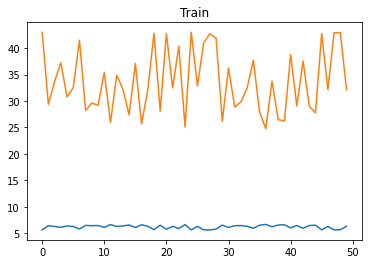

2/2 [==============================] - 1s 5ms/step


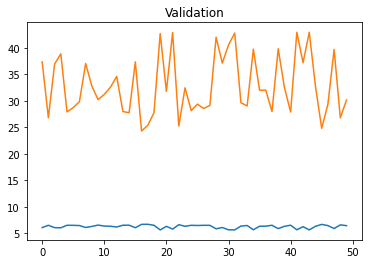

3/3 [==============================] - 0s 10ms/step


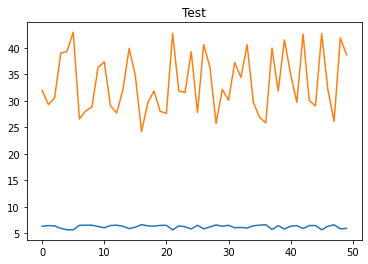

3/3 [==============================] - 0s 4ms/step


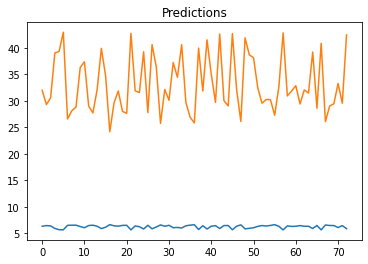

In [13]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [14]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 559.0331 - root_mean_squared_error: 23.6439 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 330ms/step - loss: 565.6084 - root_mean_squared_error: 23.7825 - val_loss: 566.0336 - val_root_mean_squared_error: 23.7915
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 521.7380 - root_mean_squared_error: 22.8416

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 528.3853 - root_mean_squared_error: 22.9866 - val_loss: 526.5469 - val_root_mean_squared_error: 22.9466
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 528.7232 - root_mean_squared_error: 22.9940

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 247ms/step - loss: 492.8046 - root_mean_squared_error: 22.1992 - val_loss: 488.4961 - val_root_mean_squared_error: 22.1019
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 471.6434 - root_mean_squared_error: 21.7174

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 231ms/step - loss: 458.4813 - root_mean_squared_error: 21.4122 - val_loss: 452.4424 - val_root_mean_squared_error: 21.2707
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 425.2673 - root_mean_squared_error: 20.6220

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 271ms/step - loss: 425.8954 - root_mean_squared_error: 20.6372 - val_loss: 418.2261 - val_root_mean_squared_error: 20.4506
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 363.3660 - root_mean_squared_error: 19.0622

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 394.6741 - root_mean_squared_error: 19.8664 - val_loss: 385.7614 - val_root_mean_squared_error: 19.6408
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 365.6258 - root_mean_squared_error: 19.1213

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 362ms/step - loss: 365.6258 - root_mean_squared_error: 19.1213 - val_loss: 354.9347 - val_root_mean_squared_error: 18.8397
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 343.8296 - root_mean_squared_error: 18.5426

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 337.7099 - root_mean_squared_error: 18.3769 - val_loss: 325.9327 - val_root_mean_squared_error: 18.0536
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 309.6975 - root_mean_squared_error: 17.5982

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 265ms/step - loss: 311.4223 - root_mean_squared_error: 17.6472 - val_loss: 298.5241 - val_root_mean_squared_error: 17.2779
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 276.3742 - root_mean_squared_error: 16.6245

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 484ms/step - loss: 286.8326 - root_mean_squared_error: 16.9361 - val_loss: 272.8189 - val_root_mean_squared_error: 16.5172
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 263.5072 - root_mean_squared_error: 16.2329

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 263.5072 - root_mean_squared_error: 16.2329 - val_loss: 248.7705 - val_root_mean_squared_error: 15.7725
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 268.3289 - root_mean_squared_error: 16.3807

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 265ms/step - loss: 241.8554 - root_mean_squared_error: 15.5517 - val_loss: 226.0534 - val_root_mean_squared_error: 15.0351
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 221.3663 - root_mean_squared_error: 14.8784

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 221.3663 - root_mean_squared_error: 14.8784 - val_loss: 204.5921 - val_root_mean_squared_error: 14.3036
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 209.3920 - root_mean_squared_error: 14.4704

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 202.1386 - root_mean_squared_error: 14.2175 - val_loss: 184.7962 - val_root_mean_squared_error: 13.5940
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 192.8169 - root_mean_squared_error: 13.8859

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 307ms/step - loss: 184.3636 - root_mean_squared_error: 13.5781 - val_loss: 166.7493 - val_root_mean_squared_error: 12.9131
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 167.3815 - root_mean_squared_error: 12.9376

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 168.1412 - root_mean_squared_error: 12.9669 - val_loss: 149.8494 - val_root_mean_squared_error: 12.2413
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 154.6038 - root_mean_squared_error: 12.4340

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 152.7981 - root_mean_squared_error: 12.3612 - val_loss: 134.2117 - val_root_mean_squared_error: 11.5850
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 138.8528 - root_mean_squared_error: 11.7836

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 138.7733 - root_mean_squared_error: 11.7802 - val_loss: 119.7628 - val_root_mean_squared_error: 10.9436
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 154.4584 - root_mean_squared_error: 12.4281

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 125.9763 - root_mean_squared_error: 11.2239 - val_loss: 106.5193 - val_root_mean_squared_error: 10.3208
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 129.1660 - root_mean_squared_error: 11.3651

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 254ms/step - loss: 113.9313 - root_mean_squared_error: 10.6739 - val_loss: 94.4060 - val_root_mean_squared_error: 9.7163
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 139.6015 - root_mean_squared_error: 11.8153

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 103.1990 - root_mean_squared_error: 10.1587 - val_loss: 83.3771 - val_root_mean_squared_error: 9.1311
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 104.1420 - root_mean_squared_error: 10.2050

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 93.2749 - root_mean_squared_error: 9.6579 - val_loss: 73.5609 - val_root_mean_squared_error: 8.5768
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 83.8731 - root_mean_squared_error: 9.1582  

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 352ms/step - loss: 84.5066 - root_mean_squared_error: 9.1927 - val_loss: 64.5765 - val_root_mean_squared_error: 8.0360
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 82.2432 - root_mean_squared_error: 9.0688

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 373ms/step - loss: 76.3741 - root_mean_squared_error: 8.7392 - val_loss: 56.3036 - val_root_mean_squared_error: 7.5036
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 65.4844 - root_mean_squared_error: 8.0922

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 416ms/step - loss: 68.9851 - root_mean_squared_error: 8.3057 - val_loss: 48.8213 - val_root_mean_squared_error: 6.9872
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 62.2926 - root_mean_squared_error: 7.8926

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 62.2926 - root_mean_squared_error: 7.8926 - val_loss: 42.3277 - val_root_mean_squared_error: 6.5060
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 54.0588 - root_mean_squared_error: 7.3525

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 56.4735 - root_mean_squared_error: 7.5149 - val_loss: 36.5761 - val_root_mean_squared_error: 6.0478
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 55.3400 - root_mean_squared_error: 7.4391

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 287ms/step - loss: 51.3482 - root_mean_squared_error: 7.1658 - val_loss: 31.3830 - val_root_mean_squared_error: 5.6021
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 29.9429 - root_mean_squared_error: 5.4720

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 46.7080 - root_mean_squared_error: 6.8343 - val_loss: 26.8494 - val_root_mean_squared_error: 5.1816
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 42.6614 - root_mean_squared_error: 6.5316

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 42.6614 - root_mean_squared_error: 6.5316 - val_loss: 22.8416 - val_root_mean_squared_error: 4.7793
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 38.2286 - root_mean_squared_error: 6.1829

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 39.0333 - root_mean_squared_error: 6.2477 - val_loss: 19.3036 - val_root_mean_squared_error: 4.3936
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 38.0890 - root_mean_squared_error: 6.1716

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 317ms/step - loss: 35.9472 - root_mean_squared_error: 5.9956 - val_loss: 16.4149 - val_root_mean_squared_error: 4.0515
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 27.3762 - root_mean_squared_error: 5.2322

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 284ms/step - loss: 33.3097 - root_mean_squared_error: 5.7715 - val_loss: 13.9051 - val_root_mean_squared_error: 3.7289
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 33.0000 - root_mean_squared_error: 5.7446

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 31.0316 - root_mean_squared_error: 5.5706 - val_loss: 11.7079 - val_root_mean_squared_error: 3.4217
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 28.8924 - root_mean_squared_error: 5.3752

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 29.0307 - root_mean_squared_error: 5.3880 - val_loss: 9.7796 - val_root_mean_squared_error: 3.1272
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 40.4260 - root_mean_squared_error: 6.3581

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 260ms/step - loss: 27.3888 - root_mean_squared_error: 5.2334 - val_loss: 8.1138 - val_root_mean_squared_error: 2.8485
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 15.1582 - root_mean_squared_error: 3.8934

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 228ms/step - loss: 25.8148 - root_mean_squared_error: 5.0808 - val_loss: 6.7745 - val_root_mean_squared_error: 2.6028
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 28.9105 - root_mean_squared_error: 5.3769

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 211ms/step - loss: 24.6455 - root_mean_squared_error: 4.9644 - val_loss: 5.6355 - val_root_mean_squared_error: 2.3739
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 30.6823 - root_mean_squared_error: 5.5392

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 23.6344 - root_mean_squared_error: 4.8615 - val_loss: 4.6806 - val_root_mean_squared_error: 2.1635
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 19.9315 - root_mean_squared_error: 4.4645

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 254ms/step - loss: 22.7672 - root_mean_squared_error: 4.7715 - val_loss: 3.9495 - val_root_mean_squared_error: 1.9873
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 25.4474 - root_mean_squared_error: 5.0445

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 339ms/step - loss: 22.0437 - root_mean_squared_error: 4.6951 - val_loss: 3.3070 - val_root_mean_squared_error: 1.8185
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 16.8295 - root_mean_squared_error: 4.1024

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 302ms/step - loss: 21.3785 - root_mean_squared_error: 4.6237 - val_loss: 2.6827 - val_root_mean_squared_error: 1.6379
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 22.4247 - root_mean_squared_error: 4.7355

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 194ms/step - loss: 20.8209 - root_mean_squared_error: 4.5630 - val_loss: 2.1947 - val_root_mean_squared_error: 1.4815
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 17.8743 - root_mean_squared_error: 4.2278

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 216ms/step - loss: 20.3742 - root_mean_squared_error: 4.5138 - val_loss: 1.7971 - val_root_mean_squared_error: 1.3405
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 19.3687 - root_mean_squared_error: 4.4010

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 20.0294 - root_mean_squared_error: 4.4754 - val_loss: 1.5085 - val_root_mean_squared_error: 1.2282
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 22.6479 - root_mean_squared_error: 4.7590

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 216ms/step - loss: 19.7452 - root_mean_squared_error: 4.4436 - val_loss: 1.2873 - val_root_mean_squared_error: 1.1346
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 17.8974 - root_mean_squared_error: 4.2305

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 19.5390 - root_mean_squared_error: 4.4203 - val_loss: 1.1147 - val_root_mean_squared_error: 1.0558
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 9.5654 - root_mean_squared_error: 3.0928

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 195ms/step - loss: 19.3683 - root_mean_squared_error: 4.4009 - val_loss: 0.9901 - val_root_mean_squared_error: 0.9950
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 19.6237 - root_mean_squared_error: 4.4299

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 166ms/step - loss: 19.2513 - root_mean_squared_error: 4.3876 - val_loss: 0.8825 - val_root_mean_squared_error: 0.9394
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 22.6377 - root_mean_squared_error: 4.7579

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 4ms/step


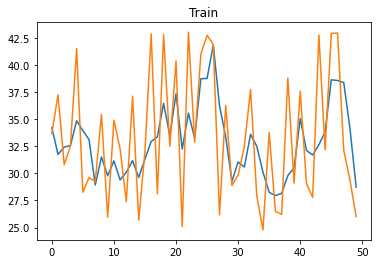

2/2 [==============================] - 0s 3ms/step


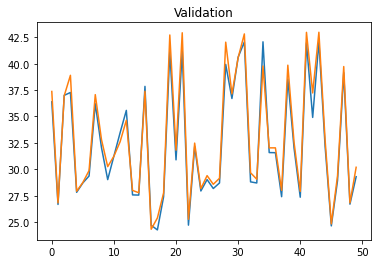

3/3 [==============================] - 0s 3ms/step


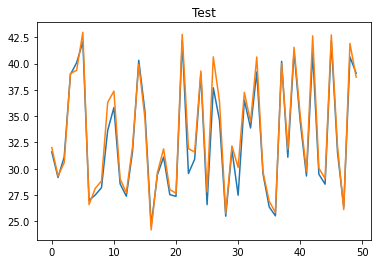

3/3 [==============================] - 0s 4ms/step


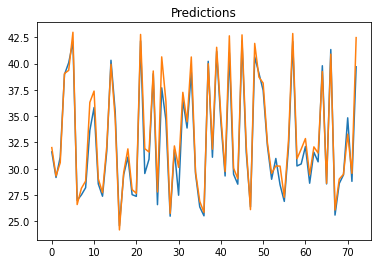

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 988.2655 - root_mean_squared_error: 31.4367 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 2s/step - loss: 986.9938 - root_mean_squared_error: 31.4165 - val_loss: 1046.7014 - val_root_mean_squared_error: 32.3528
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 1000.6173 - root_mean_squared_error: 31.6325

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 979.8894 - root_mean_squared_error: 31.3032 - val_loss: 1039.4810 - val_root_mean_squared_error: 32.2410
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 975.0110 - root_mean_squared_error: 31.2252

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 972.8159 - root_mean_squared_error: 31.1900 - val_loss: 1032.3585 - val_root_mean_squared_error: 32.1303
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 992.8416 - root_mean_squared_error: 31.5094

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 965.7920 - root_mean_squared_error: 31.0772 - val_loss: 1025.2762 - val_root_mean_squared_error: 32.0199
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 961.8228 - root_mean_squared_error: 31.0133

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 958.8293 - root_mean_squared_error: 30.9650 - val_loss: 1018.2020 - val_root_mean_squared_error: 31.9093
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 948.8436 - root_mean_squared_error: 30.8033

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 951.8669 - root_mean_squared_error: 30.8523 - val_loss: 1011.0897 - val_root_mean_squared_error: 31.7976
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 953.1237 - root_mean_squared_error: 30.8727

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 944.8418 - root_mean_squared_error: 30.7383 - val_loss: 1003.9803 - val_root_mean_squared_error: 31.6856
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 943.2127 - root_mean_squared_error: 30.7118

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 937.8312 - root_mean_squared_error: 30.6240 - val_loss: 996.7974 - val_root_mean_squared_error: 31.5721
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 931.5549 - root_mean_squared_error: 30.5214

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 930.7073 - root_mean_squared_error: 30.5075 - val_loss: 989.5497 - val_root_mean_squared_error: 31.4571
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 923.5559 - root_mean_squared_error: 30.3901

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 923.5559 - root_mean_squared_error: 30.3901 - val_loss: 982.1172 - val_root_mean_squared_error: 31.3387
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 911.6940 - root_mean_squared_error: 30.1943

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 916.1172 - root_mean_squared_error: 30.2674 - val_loss: 974.4966 - val_root_mean_squared_error: 31.2169
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 923.0654 - root_mean_squared_error: 30.3820

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 908.5485 - root_mean_squared_error: 30.1421 - val_loss: 966.6226 - val_root_mean_squared_error: 31.0906
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 878.1891 - root_mean_squared_error: 29.6343

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 900.7062 - root_mean_squared_error: 30.0118 - val_loss: 958.5528 - val_root_mean_squared_error: 30.9605
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 853.7047 - root_mean_squared_error: 29.2182

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 892.6914 - root_mean_squared_error: 29.8779 - val_loss: 950.2337 - val_root_mean_squared_error: 30.8259
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 884.0446 - root_mean_squared_error: 29.7329

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 884.4672 - root_mean_squared_error: 29.7400 - val_loss: 941.7353 - val_root_mean_squared_error: 30.6877
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 852.5230 - root_mean_squared_error: 29.1980

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 876.0739 - root_mean_squared_error: 29.5985 - val_loss: 933.1006 - val_root_mean_squared_error: 30.5467
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 941.2047 - root_mean_squared_error: 30.6791

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 867.6487 - root_mean_squared_error: 29.4559 - val_loss: 924.3349 - val_root_mean_squared_error: 30.4029
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 874.7214 - root_mean_squared_error: 29.5757

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 859.1131 - root_mean_squared_error: 29.3106 - val_loss: 915.6387 - val_root_mean_squared_error: 30.2595
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 776.8856 - root_mean_squared_error: 27.8727

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 850.6937 - root_mean_squared_error: 29.1667 - val_loss: 906.9783 - val_root_mean_squared_error: 30.1161
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 795.3639 - root_mean_squared_error: 28.2022

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 842.3432 - root_mean_squared_error: 29.0231 - val_loss: 898.3869 - val_root_mean_squared_error: 29.9731
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 867.8021 - root_mean_squared_error: 29.4585

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 834.0950 - root_mean_squared_error: 28.8807 - val_loss: 889.8085 - val_root_mean_squared_error: 29.8297
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 914.1549 - root_mean_squared_error: 30.2350

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 825.8286 - root_mean_squared_error: 28.7372 - val_loss: 881.3298 - val_root_mean_squared_error: 29.6872
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 820.8308 - root_mean_squared_error: 28.6501

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 817.6619 - root_mean_squared_error: 28.5948 - val_loss: 872.9464 - val_root_mean_squared_error: 29.5457
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 725.3767 - root_mean_squared_error: 26.9328

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 809.6156 - root_mean_squared_error: 28.4537 - val_loss: 864.6757 - val_root_mean_squared_error: 29.4054
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 786.4317 - root_mean_squared_error: 28.0434

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 801.7145 - root_mean_squared_error: 28.3146 - val_loss: 856.5533 - val_root_mean_squared_error: 29.2669
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 755.7793 - root_mean_squared_error: 27.4914

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 793.9122 - root_mean_squared_error: 28.1764 - val_loss: 848.4706 - val_root_mean_squared_error: 29.1285
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 776.4537 - root_mean_squared_error: 27.8649

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 786.1244 - root_mean_squared_error: 28.0379 - val_loss: 840.4570 - val_root_mean_squared_error: 28.9906
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 773.4800 - root_mean_squared_error: 27.8115

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 778.3249 - root_mean_squared_error: 27.8985 - val_loss: 832.4086 - val_root_mean_squared_error: 28.8515
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 738.0775 - root_mean_squared_error: 27.1676

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 770.5181 - root_mean_squared_error: 27.7582 - val_loss: 824.2985 - val_root_mean_squared_error: 28.7106
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 762.6764 - root_mean_squared_error: 27.6166

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 762.6764 - root_mean_squared_error: 27.6166 - val_loss: 816.1297 - val_root_mean_squared_error: 28.5680
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 749.0130 - root_mean_squared_error: 27.3681

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 754.7212 - root_mean_squared_error: 27.4722 - val_loss: 807.9497 - val_root_mean_squared_error: 28.4245
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 768.8661 - root_mean_squared_error: 27.7284

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 746.7302 - root_mean_squared_error: 27.3264 - val_loss: 799.7131 - val_root_mean_squared_error: 28.2792
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 705.7084 - root_mean_squared_error: 26.5652

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 738.6271 - root_mean_squared_error: 27.1777 - val_loss: 791.2988 - val_root_mean_squared_error: 28.1300
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 726.3779 - root_mean_squared_error: 26.9514

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 730.4055 - root_mean_squared_error: 27.0260 - val_loss: 782.7921 - val_root_mean_squared_error: 27.9784
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 726.2261 - root_mean_squared_error: 26.9486

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 721.9522 - root_mean_squared_error: 26.8692 - val_loss: 774.1263 - val_root_mean_squared_error: 27.8231
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 737.6617 - root_mean_squared_error: 27.1599

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 713.3419 - root_mean_squared_error: 26.7085 - val_loss: 765.3287 - val_root_mean_squared_error: 27.6646
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 621.1277 - root_mean_squared_error: 24.9224

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 704.5185 - root_mean_squared_error: 26.5428 - val_loss: 756.3950 - val_root_mean_squared_error: 27.5026
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 674.0168 - root_mean_squared_error: 25.9618

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 695.6631 - root_mean_squared_error: 26.3754 - val_loss: 747.3127 - val_root_mean_squared_error: 27.3370
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 700.3056 - root_mean_squared_error: 26.4633

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 686.6179 - root_mean_squared_error: 26.2034 - val_loss: 738.0701 - val_root_mean_squared_error: 27.1674
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 717.0171 - root_mean_squared_error: 26.7772

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 677.5392 - root_mean_squared_error: 26.0296 - val_loss: 728.8237 - val_root_mean_squared_error: 26.9967
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 663.5987 - root_mean_squared_error: 25.7604

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 668.4232 - root_mean_squared_error: 25.8539 - val_loss: 719.4061 - val_root_mean_squared_error: 26.8217
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 649.7643 - root_mean_squared_error: 25.4905

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 659.1008 - root_mean_squared_error: 25.6730 - val_loss: 709.6310 - val_root_mean_squared_error: 26.6389
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 619.5081 - root_mean_squared_error: 24.8899

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 649.2805 - root_mean_squared_error: 25.4810 - val_loss: 699.4273 - val_root_mean_squared_error: 26.4467
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 638.6129 - root_mean_squared_error: 25.2708

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 638.6129 - root_mean_squared_error: 25.2708 - val_loss: 688.7520 - val_root_mean_squared_error: 26.2441
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 627.4135 - root_mean_squared_error: 25.0482

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 627.4135 - root_mean_squared_error: 25.0482 - val_loss: 677.8361 - val_root_mean_squared_error: 26.0353
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 616.0781 - root_mean_squared_error: 24.8209

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 616.0781 - root_mean_squared_error: 24.8209 - val_loss: 667.0462 - val_root_mean_squared_error: 25.8272
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 604.2228 - root_mean_squared_error: 24.5809

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 605.5490 - root_mean_squared_error: 24.6079 - val_loss: 656.8393 - val_root_mean_squared_error: 25.6289
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 612.8889 - root_mean_squared_error: 24.7566

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 596.3697 - root_mean_squared_error: 24.4207 - val_loss: 647.6225 - val_root_mean_squared_error: 25.4484
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 595.2311 - root_mean_squared_error: 24.3974

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 588.3410 - root_mean_squared_error: 24.2557 - val_loss: 639.4180 - val_root_mean_squared_error: 25.2867
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 642.1310 - root_mean_squared_error: 25.3403

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 13ms/step


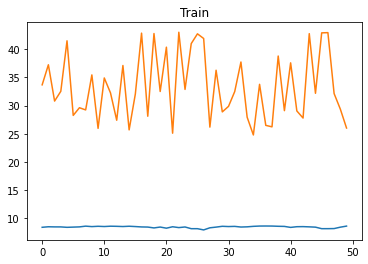

2/2 [==============================] - 1s 15ms/step


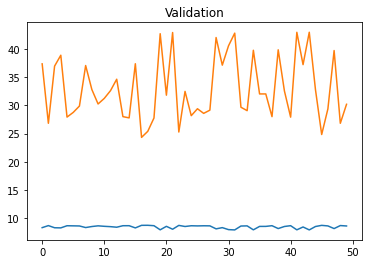

3/3 [==============================] - 0s 20ms/step


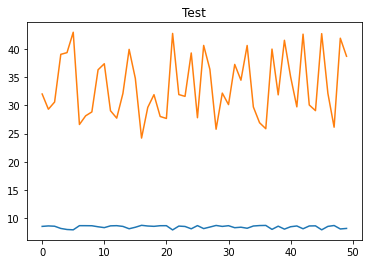

3/3 [==============================] - 0s 7ms/step


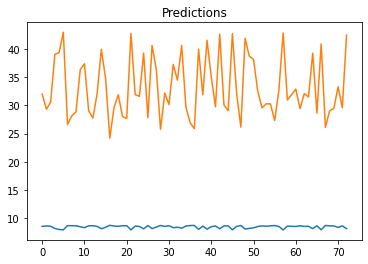

In [16]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1031.5850 - root_mean_squared_error: 32.1183

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 3s/step - loss: 1031.5850 - root_mean_squared_error: 32.1183 - val_loss: 1095.2595 - val_root_mean_squared_error: 33.0947
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1016.7444 - root_mean_squared_error: 31.8864

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 1029.0826 - root_mean_squared_error: 32.0793 - val_loss: 1092.7206 - val_root_mean_squared_error: 33.0563
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1012.1577 - root_mean_squared_error: 31.8144

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 1026.5525 - root_mean_squared_error: 32.0399 - val_loss: 1090.1827 - val_root_mean_squared_error: 33.0179
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1024.0095 - root_mean_squared_error: 32.0001

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1024.0095 - root_mean_squared_error: 32.0001 - val_loss: 1087.6206 - val_root_mean_squared_error: 32.9791
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1021.4672 - root_mean_squared_error: 31.9604

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1021.4672 - root_mean_squared_error: 31.9604 - val_loss: 1085.0323 - val_root_mean_squared_error: 32.9398
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1011.5718 - root_mean_squared_error: 31.8052

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1018.8859 - root_mean_squared_error: 31.9200 - val_loss: 1082.4022 - val_root_mean_squared_error: 32.8999
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1011.6093 - root_mean_squared_error: 31.8058

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1016.2704 - root_mean_squared_error: 31.8790 - val_loss: 1079.6936 - val_root_mean_squared_error: 32.8587
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1013.0739 - root_mean_squared_error: 31.8288

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1013.5728 - root_mean_squared_error: 31.8367 - val_loss: 1076.8949 - val_root_mean_squared_error: 32.8161
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 1009.0439 - root_mean_squared_error: 31.7655

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1010.7802 - root_mean_squared_error: 31.7928 - val_loss: 1074.0205 - val_root_mean_squared_error: 32.7723
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 1006.8200 - root_mean_squared_error: 31.7304

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1007.9160 - root_mean_squared_error: 31.7477 - val_loss: 1071.0542 - val_root_mean_squared_error: 32.7270
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 1014.1279 - root_mean_squared_error: 31.8454

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 1004.9547 - root_mean_squared_error: 31.7010 - val_loss: 1067.9976 - val_root_mean_squared_error: 32.6802
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 995.5085 - root_mean_squared_error: 31.5517

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 1001.8898 - root_mean_squared_error: 31.6526 - val_loss: 1064.8367 - val_root_mean_squared_error: 32.6318
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 998.8399 - root_mean_squared_error: 31.6044 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 998.7143 - root_mean_squared_error: 31.6024 - val_loss: 1061.5262 - val_root_mean_squared_error: 32.5811
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 1039.9156 - root_mean_squared_error: 32.2477

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 995.3974 - root_mean_squared_error: 31.5499 - val_loss: 1058.0870 - val_root_mean_squared_error: 32.5283
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 974.2206 - root_mean_squared_error: 31.2125

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 991.9324 - root_mean_squared_error: 31.4950 - val_loss: 1054.5198 - val_root_mean_squared_error: 32.4734
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 943.1344 - root_mean_squared_error: 30.7105

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 988.3396 - root_mean_squared_error: 31.4379 - val_loss: 1050.7847 - val_root_mean_squared_error: 32.4158
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 984.5848 - root_mean_squared_error: 31.3781 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 984.5848 - root_mean_squared_error: 31.3781 - val_loss: 1046.8602 - val_root_mean_squared_error: 32.3552
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 980.6321 - root_mean_squared_error: 31.3150

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 980.6321 - root_mean_squared_error: 31.3150 - val_loss: 1042.7518 - val_root_mean_squared_error: 32.2917
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 980.8682 - root_mean_squared_error: 31.3188 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 976.4949 - root_mean_squared_error: 31.2489 - val_loss: 1038.4238 - val_root_mean_squared_error: 32.2246
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 934.8002 - root_mean_squared_error: 30.5745

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 972.1370 - root_mean_squared_error: 31.1791 - val_loss: 1033.9031 - val_root_mean_squared_error: 32.1544
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 967.5845 - root_mean_squared_error: 31.1060

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 967.5845 - root_mean_squared_error: 31.1060 - val_loss: 1029.1459 - val_root_mean_squared_error: 32.0803
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 949.5912 - root_mean_squared_error: 30.8154

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 962.7828 - root_mean_squared_error: 31.0287 - val_loss: 1024.1505 - val_root_mean_squared_error: 32.0023
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 891.7186 - root_mean_squared_error: 29.8617

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 957.7568 - root_mean_squared_error: 30.9476 - val_loss: 1018.8774 - val_root_mean_squared_error: 31.9199
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 965.0353 - root_mean_squared_error: 31.0650

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 952.4669 - root_mean_squared_error: 30.8621 - val_loss: 1013.3387 - val_root_mean_squared_error: 31.8330
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 945.5397 - root_mean_squared_error: 30.7496

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 946.8646 - root_mean_squared_error: 30.7712 - val_loss: 1007.4903 - val_root_mean_squared_error: 31.7410
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 940.9859 - root_mean_squared_error: 30.6755

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 940.9859 - root_mean_squared_error: 30.6755 - val_loss: 1001.3391 - val_root_mean_squared_error: 31.6439
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 928.6896 - root_mean_squared_error: 30.4744

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 934.7796 - root_mean_squared_error: 30.5742 - val_loss: 994.8873 - val_root_mean_squared_error: 31.5418
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 933.3721 - root_mean_squared_error: 30.5511 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 928.2723 - root_mean_squared_error: 30.4676 - val_loss: 988.0354 - val_root_mean_squared_error: 31.4330
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 848.1910 - root_mean_squared_error: 29.1237

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 921.3426 - root_mean_squared_error: 30.3536 - val_loss: 980.8531 - val_root_mean_squared_error: 31.3186
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 914.0830 - root_mean_squared_error: 30.2338

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 914.0830 - root_mean_squared_error: 30.2338 - val_loss: 973.2421 - val_root_mean_squared_error: 31.1968
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 860.9542 - root_mean_squared_error: 29.3420

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 906.3422 - root_mean_squared_error: 30.1055 - val_loss: 965.1635 - val_root_mean_squared_error: 31.0671
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 915.0815 - root_mean_squared_error: 30.2503

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 898.0851 - root_mean_squared_error: 29.9681 - val_loss: 956.5082 - val_root_mean_squared_error: 30.9275
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 891.0568 - root_mean_squared_error: 29.8506

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 889.1950 - root_mean_squared_error: 29.8194 - val_loss: 947.2283 - val_root_mean_squared_error: 30.7771
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 853.9640 - root_mean_squared_error: 29.2227

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 879.6238 - root_mean_squared_error: 29.6585 - val_loss: 936.7008 - val_root_mean_squared_error: 30.6056
Epoch 35/50
3/8 [==========>...................] - ETA: 0s - loss: 917.1421 - root_mean_squared_error: 30.2844

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 867.8713 - root_mean_squared_error: 29.4597 - val_loss: 923.2444 - val_root_mean_squared_error: 30.3849
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 853.4044 - root_mean_squared_error: 29.2131

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 853.4044 - root_mean_squared_error: 29.2131 - val_loss: 908.1192 - val_root_mean_squared_error: 30.1350
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 826.6363 - root_mean_squared_error: 28.7513

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 838.4792 - root_mean_squared_error: 28.9565 - val_loss: 892.8515 - val_root_mean_squared_error: 29.8806
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 884.5629 - root_mean_squared_error: 29.7416

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 823.5749 - root_mean_squared_error: 28.6980 - val_loss: 877.7408 - val_root_mean_squared_error: 29.6267
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 812.6528 - root_mean_squared_error: 28.5071

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 808.9561 - root_mean_squared_error: 28.4422 - val_loss: 862.7072 - val_root_mean_squared_error: 29.3719
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 840.3500 - root_mean_squared_error: 28.9888

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 794.3657 - root_mean_squared_error: 28.1845 - val_loss: 848.0028 - val_root_mean_squared_error: 29.1205
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 784.5737 - root_mean_squared_error: 28.0102

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 780.0351 - root_mean_squared_error: 27.9291 - val_loss: 833.3143 - val_root_mean_squared_error: 28.8672
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 747.3934 - root_mean_squared_error: 27.3385

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 765.7321 - root_mean_squared_error: 27.6719 - val_loss: 818.8079 - val_root_mean_squared_error: 28.6148
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 751.5693 - root_mean_squared_error: 27.4148

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 751.7100 - root_mean_squared_error: 27.4173 - val_loss: 804.4345 - val_root_mean_squared_error: 28.3626
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 792.6331 - root_mean_squared_error: 28.1537

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 737.9521 - root_mean_squared_error: 27.1653 - val_loss: 790.2374 - val_root_mean_squared_error: 28.1112
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 669.2378 - root_mean_squared_error: 25.8696

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 724.3464 - root_mean_squared_error: 26.9137 - val_loss: 776.2934 - val_root_mean_squared_error: 27.8620
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 705.7811 - root_mean_squared_error: 26.5665

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 711.1436 - root_mean_squared_error: 26.6673 - val_loss: 762.6821 - val_root_mean_squared_error: 27.6167
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 660.0887 - root_mean_squared_error: 25.6922

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 698.2957 - root_mean_squared_error: 26.4253 - val_loss: 749.4689 - val_root_mean_squared_error: 27.3764
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 684.5381 - root_mean_squared_error: 26.1637

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 685.8722 - root_mean_squared_error: 26.1892 - val_loss: 736.6578 - val_root_mean_squared_error: 27.1414
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 685.4550 - root_mean_squared_error: 26.1812

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 673.8580 - root_mean_squared_error: 25.9588 - val_loss: 724.2671 - val_root_mean_squared_error: 26.9122
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 661.2231 - root_mean_squared_error: 25.7143

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 8ms/step


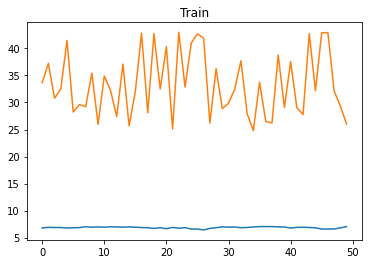

2/2 [==============================] - 2s 5ms/step


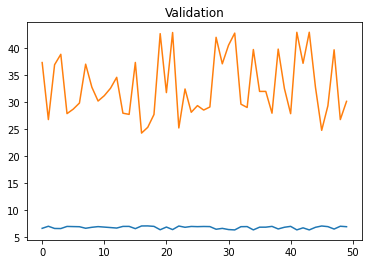

3/3 [==============================] - 0s 3ms/step


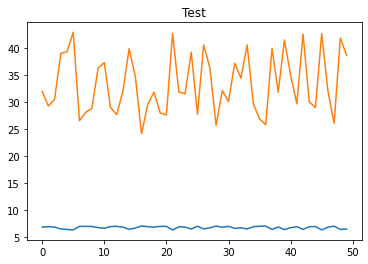

3/3 [==============================] - 0s 15ms/step


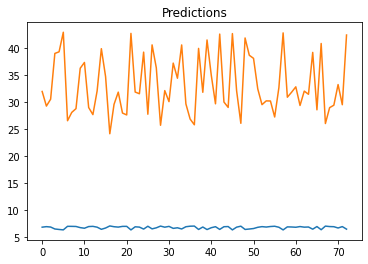

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1064.2444 - root_mean_squared_error: 32.6228 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 1064.2444 - root_mean_squared_error: 32.6228 - val_loss: 1124.5226 - val_root_mean_squared_error: 33.5339
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1067.8616 - root_mean_squared_error: 32.6782INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 1055.7201 - root_mean_squared_error: 32.4918 - val_loss: 1115.6384 - val_root_mean_squared_error: 33.4012
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1062.6760 - root_mean_squared_error: 32.5987INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 1047.1359 - root_mean_squared_error: 32.3595 - val_loss: 1106.6287 - val_root_mean_squared_error: 33.2660
Epoch 4/50
4/8 [==============>...............] - ETA: 0s - loss: 1055.9312 - root_mean_squared_error: 32.4951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 759ms/step - loss: 1038.3491 - root_mean_squared_error: 32.2234 - val_loss: 1097.4546 - val_root_mean_squared_error: 33.1279
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1029.3846 - root_mean_squared_error: 32.0840INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 1029.3846 - root_mean_squared_error: 32.0840 - val_loss: 1088.1289 - val_root_mean_squared_error: 32.9868
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1072.6420 - root_mean_squared_error: 32.7512INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 802ms/step - loss: 1020.3036 - root_mean_squared_error: 31.9422 - val_loss: 1078.6254 - val_root_mean_squared_error: 32.8424
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1013.3320 - root_mean_squared_error: 31.8329INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 1011.0025 - root_mean_squared_error: 31.7963 - val_loss: 1068.9987 - val_root_mean_squared_error: 32.6955
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1004.0724 - root_mean_squared_error: 31.6871INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 589ms/step - loss: 1001.6298 - root_mean_squared_error: 31.6485 - val_loss: 1059.1884 - val_root_mean_squared_error: 32.5452
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 983.2742 - root_mean_squared_error: 31.3572INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 646ms/step - loss: 991.9751 - root_mean_squared_error: 31.4956 - val_loss: 1049.2990 - val_root_mean_squared_error: 32.3929
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 1033.4598 - root_mean_squared_error: 32.1475INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 727ms/step - loss: 982.2993 - root_mean_squared_error: 31.3417 - val_loss: 1039.2600 - val_root_mean_squared_error: 32.2376
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 1010.7344 - root_mean_squared_error: 31.7920INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 972.4418 - root_mean_squared_error: 31.1840 - val_loss: 1029.1152 - val_root_mean_squared_error: 32.0798
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 967.1416 - root_mean_squared_error: 31.0989INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 803ms/step - loss: 962.4678 - root_mean_squared_error: 31.0237 - val_loss: 1018.9910 - val_root_mean_squared_error: 31.9216
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 966.5645 - root_mean_squared_error: 31.0896INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 766ms/step - loss: 952.5389 - root_mean_squared_error: 30.8632 - val_loss: 1008.9474 - val_root_mean_squared_error: 31.7639
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 942.6413 - root_mean_squared_error: 30.7025INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 942.6413 - root_mean_squared_error: 30.7025 - val_loss: 998.8994 - val_root_mean_squared_error: 31.6054
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 932.7405 - root_mean_squared_error: 30.5408INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 932.7405 - root_mean_squared_error: 30.5408 - val_loss: 988.9740 - val_root_mean_squared_error: 31.4480
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 923.0316 - root_mean_squared_error: 30.3814INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 693ms/step - loss: 923.0316 - root_mean_squared_error: 30.3814 - val_loss: 979.1558 - val_root_mean_squared_error: 31.2915
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 913.4052 - root_mean_squared_error: 30.2226INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 639ms/step - loss: 913.4052 - root_mean_squared_error: 30.2226 - val_loss: 969.5740 - val_root_mean_squared_error: 31.1380
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 867.0325 - root_mean_squared_error: 29.4454INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 904.1045 - root_mean_squared_error: 30.0683 - val_loss: 960.3296 - val_root_mean_squared_error: 30.9892
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 918.4626 - root_mean_squared_error: 30.3061INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 895.1752 - root_mean_squared_error: 29.9195 - val_loss: 951.4653 - val_root_mean_squared_error: 30.8458
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 886.6268 - root_mean_squared_error: 29.7763INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 695ms/step - loss: 886.6268 - root_mean_squared_error: 29.7763 - val_loss: 942.9716 - val_root_mean_squared_error: 30.7078
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 910.4536 - root_mean_squared_error: 30.1737INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 878.4539 - root_mean_squared_error: 29.6387 - val_loss: 934.7208 - val_root_mean_squared_error: 30.5732
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 881.1728 - root_mean_squared_error: 29.6846INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 643ms/step - loss: 870.5684 - root_mean_squared_error: 29.5054 - val_loss: 926.7061 - val_root_mean_squared_error: 30.4418
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 860.8044 - root_mean_squared_error: 29.3395INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 803ms/step - loss: 862.8870 - root_mean_squared_error: 29.3749 - val_loss: 918.7883 - val_root_mean_squared_error: 30.3115
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 853.4390 - root_mean_squared_error: 29.2137INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 536ms/step - loss: 855.2072 - root_mean_squared_error: 29.2439 - val_loss: 910.7291 - val_root_mean_squared_error: 30.1783
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 822.6057 - root_mean_squared_error: 28.6811INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 610ms/step - loss: 847.3794 - root_mean_squared_error: 29.1098 - val_loss: 902.2983 - val_root_mean_squared_error: 30.0383
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 856.2563 - root_mean_squared_error: 29.2619INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 839.0182 - root_mean_squared_error: 28.9658 - val_loss: 893.2767 - val_root_mean_squared_error: 29.8877
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 859.8354 - root_mean_squared_error: 29.3230INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 868ms/step - loss: 829.8425 - root_mean_squared_error: 28.8070 - val_loss: 883.4367 - val_root_mean_squared_error: 29.7227
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 817.5111 - root_mean_squared_error: 28.5922INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 819.4559 - root_mean_squared_error: 28.6261 - val_loss: 872.5600 - val_root_mean_squared_error: 29.5391
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 820.7308 - root_mean_squared_error: 28.6484INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 827ms/step - loss: 807.7012 - root_mean_squared_error: 28.4201 - val_loss: 860.6461 - val_root_mean_squared_error: 29.3368
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 873.6218 - root_mean_squared_error: 29.5571INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 496ms/step - loss: 794.6757 - root_mean_squared_error: 28.1900 - val_loss: 847.9011 - val_root_mean_squared_error: 29.1187
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 821.9709 - root_mean_squared_error: 28.6700INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 742ms/step - loss: 780.7520 - root_mean_squared_error: 27.9419 - val_loss: 834.5244 - val_root_mean_squared_error: 28.8881
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 849.7802 - root_mean_squared_error: 29.1510INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 766.4225 - root_mean_squared_error: 27.6843 - val_loss: 820.9304 - val_root_mean_squared_error: 28.6519
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 752.3300 - root_mean_squared_error: 27.4286INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 752.3300 - root_mean_squared_error: 27.4286 - val_loss: 807.4518 - val_root_mean_squared_error: 28.4157
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 766.7814 - root_mean_squared_error: 27.6908INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 738.8688 - root_mean_squared_error: 27.1821 - val_loss: 794.4738 - val_root_mean_squared_error: 28.1864
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 726.3541 - root_mean_squared_error: 26.9510INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 726.3541 - root_mean_squared_error: 26.9510 - val_loss: 781.9398 - val_root_mean_squared_error: 27.9632
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 701.7870 - root_mean_squared_error: 26.4913INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 850ms/step - loss: 714.4964 - root_mean_squared_error: 26.7301 - val_loss: 769.9562 - val_root_mean_squared_error: 27.7481
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 757.2886 - root_mean_squared_error: 27.5189INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 931ms/step - loss: 703.2468 - root_mean_squared_error: 26.5188 - val_loss: 758.3730 - val_root_mean_squared_error: 27.5386
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 692.2151 - root_mean_squared_error: 26.3100INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 692.2151 - root_mean_squared_error: 26.3100 - val_loss: 747.2058 - val_root_mean_squared_error: 27.3351
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 682.5420 - root_mean_squared_error: 26.1255INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 681.2465 - root_mean_squared_error: 26.1007 - val_loss: 736.3006 - val_root_mean_squared_error: 27.1349
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 698.2689 - root_mean_squared_error: 26.4248INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 786ms/step - loss: 670.2277 - root_mean_squared_error: 25.8888 - val_loss: 725.4988 - val_root_mean_squared_error: 26.9351
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 714.4745 - root_mean_squared_error: 26.7297INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 773ms/step - loss: 659.0937 - root_mean_squared_error: 25.6728 - val_loss: 714.9161 - val_root_mean_squared_error: 26.7379
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 632.4615 - root_mean_squared_error: 25.1488INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 648.1158 - root_mean_squared_error: 25.4581 - val_loss: 704.5336 - val_root_mean_squared_error: 26.5431
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 617.2898 - root_mean_squared_error: 24.8453INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 637.3257 - root_mean_squared_error: 25.2453 - val_loss: 694.4061 - val_root_mean_squared_error: 26.3516
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 619.8196 - root_mean_squared_error: 24.8962INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 710ms/step - loss: 626.9121 - root_mean_squared_error: 25.0382 - val_loss: 684.5023 - val_root_mean_squared_error: 26.1630
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 631.2296 - root_mean_squared_error: 25.1243INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 617.0208 - root_mean_squared_error: 24.8399 - val_loss: 674.8535 - val_root_mean_squared_error: 25.9779
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 587.7194 - root_mean_squared_error: 24.2429INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 626ms/step - loss: 607.3022 - root_mean_squared_error: 24.6435 - val_loss: 665.6283 - val_root_mean_squared_error: 25.7998
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 524.6647 - root_mean_squared_error: 22.9056INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 598.2340 - root_mean_squared_error: 24.4588 - val_loss: 656.6633 - val_root_mean_squared_error: 25.6254
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 628.5275 - root_mean_squared_error: 25.0704INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 589.4898 - root_mean_squared_error: 24.2794 - val_loss: 648.0151 - val_root_mean_squared_error: 25.4561
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 655.4326 - root_mean_squared_error: 25.6014INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 800ms/step - loss: 581.0655 - root_mean_squared_error: 24.1053 - val_loss: 639.2713 - val_root_mean_squared_error: 25.2838
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 524.2025 - root_mean_squared_error: 22.8955INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 5ms/step


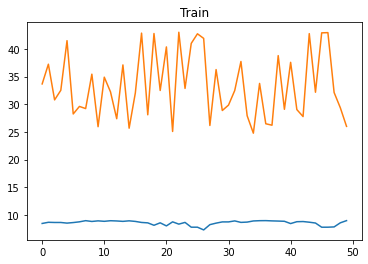

2/2 [==============================] - 0s 6ms/step


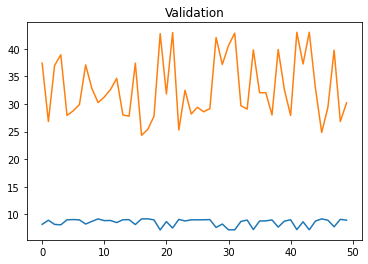

3/3 [==============================] - 0s 4ms/step


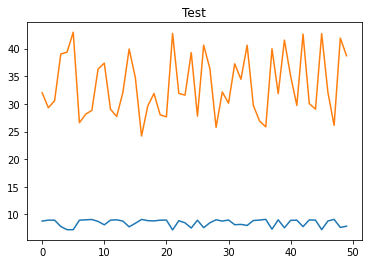

3/3 [==============================] - 0s 4ms/step


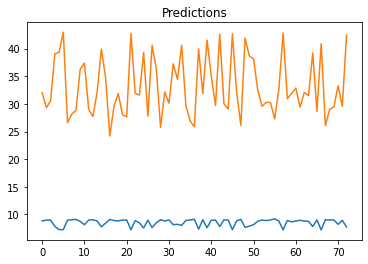

In [18]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 927.3342 - root_mean_squared_error: 30.4522 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 527ms/step - loss: 903.5409 - root_mean_squared_error: 30.0590 - val_loss: 756.0756 - val_root_mean_squared_error: 27.4968
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 704.1505 - root_mean_squared_error: 26.5358

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 562ms/step - loss: 717.2563 - root_mean_squared_error: 26.7816 - val_loss: 590.6746 - val_root_mean_squared_error: 24.3038
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 618.2422 - root_mean_squared_error: 24.8645

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 537ms/step - loss: 597.2227 - root_mean_squared_error: 24.4381 - val_loss: 450.2906 - val_root_mean_squared_error: 21.2201
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 453.9092 - root_mean_squared_error: 21.3051

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 355ms/step - loss: 450.9845 - root_mean_squared_error: 21.2364 - val_loss: 338.3134 - val_root_mean_squared_error: 18.3933
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 370.7809 - root_mean_squared_error: 19.2557

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 341ms/step - loss: 370.7809 - root_mean_squared_error: 19.2557 - val_loss: 249.9113 - val_root_mean_squared_error: 15.8086
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 315.0096 - root_mean_squared_error: 17.7485

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 429ms/step - loss: 274.9834 - root_mean_squared_error: 16.5826 - val_loss: 196.0869 - val_root_mean_squared_error: 14.0031
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 219.3076 - root_mean_squared_error: 14.8090

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 217.3015 - root_mean_squared_error: 14.7411 - val_loss: 131.1091 - val_root_mean_squared_error: 11.4503
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 169.0810 - root_mean_squared_error: 13.0031

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 421ms/step - loss: 169.0456 - root_mean_squared_error: 13.0018 - val_loss: 73.5028 - val_root_mean_squared_error: 8.5734
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 113.4478 - root_mean_squared_error: 10.6512

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 452ms/step - loss: 113.4478 - root_mean_squared_error: 10.6512 - val_loss: 34.2726 - val_root_mean_squared_error: 5.8543
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 78.0292 - root_mean_squared_error: 8.8334

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 387ms/step - loss: 77.2822 - root_mean_squared_error: 8.7910 - val_loss: 12.5084 - val_root_mean_squared_error: 3.5367
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 68.9965 - root_mean_squared_error: 8.3064

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 379ms/step - loss: 65.1134 - root_mean_squared_error: 8.0693 - val_loss: 3.0289 - val_root_mean_squared_error: 1.7404
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 59.5717 - root_mean_squared_error: 7.7183

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 59.5717 - root_mean_squared_error: 7.7183 - val_loss: 0.7121 - val_root_mean_squared_error: 0.8438
Epoch 13/50
8/8 [==============================] - 0s 39ms/step - loss: 51.3200 - root_mean_squared_error: 7.1638 - val_loss: 1.3111 - val_root_mean_squared_error: 1.1450
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 49.6327 - root_mean_squared_error: 7.0450 - val_loss: 2.3607 - val_root_mean_squared_error: 1.5365
Epoch 15/50
8/8 [==============================] - 0s 23ms/step - loss: 43.8647 - root_mean_squared_error: 6.6230 - val_loss: 2.8986 - val_root_mean_squared_error: 1.7025
Epoch 16/50
8/8 [==============================] - 0s 29ms/step - loss: 50.0404 - root_mean_squared_error: 7.0739 - val_loss: 3.3343 - val_root_mean_squared_error: 1.8260
Epoch 17/50
8/8 [==============================] - 0s 22ms/step - loss: 51.5585 - root_mean_squared_error: 7.1804 - val_loss: 3.0245 - val_root_mean_squared

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 442ms/step - loss: 48.9540 - root_mean_squared_error: 6.9967 - val_loss: 0.6892 - val_root_mean_squared_error: 0.8302
Epoch 28/50
8/8 [==============================] - 0s 26ms/step - loss: 44.5503 - root_mean_squared_error: 6.6746 - val_loss: 0.6899 - val_root_mean_squared_error: 0.8306
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 49.1347 - root_mean_squared_error: 7.0096 - val_loss: 0.7257 - val_root_mean_squared_error: 0.8519
Epoch 30/50
8/8 [==============================] - 0s 20ms/step - loss: 42.0837 - root_mean_squared_error: 6.4872 - val_loss: 0.7228 - val_root_mean_squared_error: 0.8502
Epoch 31/50
8/8 [==============================] - 0s 14ms/step - loss: 42.7324 - root_mean_squared_error: 6.5370 - val_loss: 0.7174 - val_root_mean_squared_error: 0.8470
Epoch 32/50
8/8 [==============================] - 0s 17ms/step - loss: 59.4603 - root_mean_squared_error: 7.7110 - val_loss: 0.7255 - val_root_mean_squared

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 38.5957 - root_mean_squared_error: 6.2125 - val_loss: 0.6849 - val_root_mean_squared_error: 0.8276
Epoch 44/50
8/8 [==============================] - 0s 43ms/step - loss: 33.9470 - root_mean_squared_error: 5.8264 - val_loss: 0.7372 - val_root_mean_squared_error: 0.8586
Epoch 45/50
8/8 [==============================] - 0s 51ms/step - loss: 35.9255 - root_mean_squared_error: 5.9938 - val_loss: 0.8000 - val_root_mean_squared_error: 0.8944
Epoch 46/50
8/8 [==============================] - 0s 34ms/step - loss: 33.4547 - root_mean_squared_error: 5.7840 - val_loss: 0.7869 - val_root_mean_squared_error: 0.8870
Epoch 47/50
8/8 [==============================] - 0s 32ms/step - loss: 34.4057 - root_mean_squared_error: 5.8656 - val_loss: 0.6934 - val_root_mean_squared_error: 0.8327
Epoch 48/50
8/8 [==============================] - 0s 23ms/step - loss: 34.9440 - root_mean_squared_error: 5.9113 - val_loss: 0.7206 - val_root_mean_squared

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 424ms/step - loss: 38.3201 - root_mean_squared_error: 6.1903 - val_loss: 0.6828 - val_root_mean_squared_error: 0.8263
Epoch 50/50
8/8 [==============================] - 0s 4ms/step


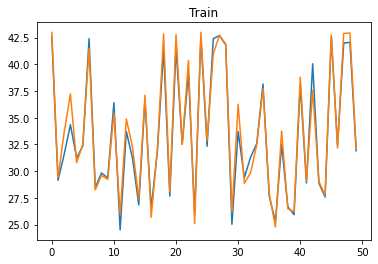

2/2 [==============================] - 0s 7ms/step


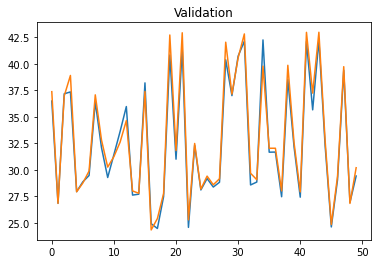

3/3 [==============================] - 0s 7ms/step


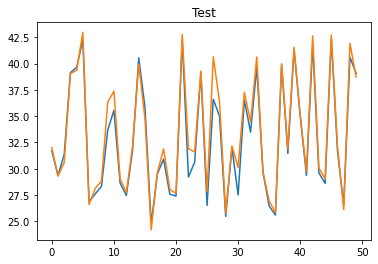

3/3 [==============================] - 0s 3ms/step


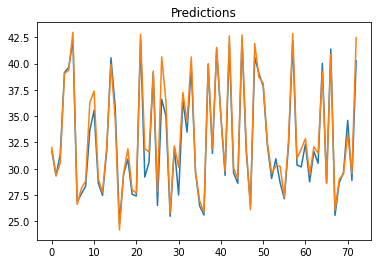

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_cnn_mse

1.0246518788546115

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1031.9591 - root_mean_squared_error: 32.1241  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 2s/step - loss: 1030.6013 - root_mean_squared_error: 32.1030 - val_loss: 1090.3567 - val_root_mean_squared_error: 33.0205
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1033.4663 - root_mean_squared_error: 32.1476

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1024.8832 - root_mean_squared_error: 32.0138 - val_loss: 1083.8929 - val_root_mean_squared_error: 32.9225
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1018.4183 - root_mean_squared_error: 31.9127

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1018.4183 - root_mean_squared_error: 31.9127 - val_loss: 1077.3751 - val_root_mean_squared_error: 32.8234
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1012.3077 - root_mean_squared_error: 31.8168

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1011.1254 - root_mean_squared_error: 31.7982 - val_loss: 1070.7998 - val_root_mean_squared_error: 32.7231
Epoch 5/50
4/8 [==============>...............] - ETA: 0s - loss: 992.9725 - root_mean_squared_error: 31.5115 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1005.9171 - root_mean_squared_error: 31.7162 - val_loss: 1064.1135 - val_root_mean_squared_error: 32.6208
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 994.3110 - root_mean_squared_error: 31.5327 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 997.6850 - root_mean_squared_error: 31.5862 - val_loss: 1057.3265 - val_root_mean_squared_error: 32.5166
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 994.7964 - root_mean_squared_error: 31.5404 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 988.3237 - root_mean_squared_error: 31.4376 - val_loss: 1050.4382 - val_root_mean_squared_error: 32.4105
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 962.5801 - root_mean_squared_error: 31.0255 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 988.7446 - root_mean_squared_error: 31.4443 - val_loss: 1043.4584 - val_root_mean_squared_error: 32.3026
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 978.7251 - root_mean_squared_error: 31.2846

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 979.4252 - root_mean_squared_error: 31.2958 - val_loss: 1036.3239 - val_root_mean_squared_error: 32.1920
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 976.6880 - root_mean_squared_error: 31.2520 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 973.9562 - root_mean_squared_error: 31.2083 - val_loss: 1029.0692 - val_root_mean_squared_error: 32.0791
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 962.2769 - root_mean_squared_error: 31.0206

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 967.5202 - root_mean_squared_error: 31.1050 - val_loss: 1021.7056 - val_root_mean_squared_error: 31.9641
Epoch 12/50
4/8 [==============>...............] - ETA: 0s - loss: 946.0193 - root_mean_squared_error: 30.7574

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 956.3311 - root_mean_squared_error: 30.9246 - val_loss: 1014.2155 - val_root_mean_squared_error: 31.8468
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 944.7012 - root_mean_squared_error: 30.7360

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 950.9576 - root_mean_squared_error: 30.8376 - val_loss: 1006.6067 - val_root_mean_squared_error: 31.7271
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 997.4203 - root_mean_squared_error: 31.5820

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 941.9467 - root_mean_squared_error: 30.6912 - val_loss: 998.8828 - val_root_mean_squared_error: 31.6051
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 936.0233 - root_mean_squared_error: 30.5945 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 936.0233 - root_mean_squared_error: 30.5945 - val_loss: 991.0209 - val_root_mean_squared_error: 31.4805
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 924.4529 - root_mean_squared_error: 30.4048 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 925.9211 - root_mean_squared_error: 30.4290 - val_loss: 982.9460 - val_root_mean_squared_error: 31.3520
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 913.8322 - root_mean_squared_error: 30.2297

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 918.7026 - root_mean_squared_error: 30.3101 - val_loss: 974.7626 - val_root_mean_squared_error: 31.2212
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 930.7906 - root_mean_squared_error: 30.5089

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 912.3073 - root_mean_squared_error: 30.2044 - val_loss: 966.3924 - val_root_mean_squared_error: 31.0869
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 894.0518 - root_mean_squared_error: 29.9007

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 901.0435 - root_mean_squared_error: 30.0174 - val_loss: 957.8602 - val_root_mean_squared_error: 30.9493
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 893.0861 - root_mean_squared_error: 29.8845

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 893.0861 - root_mean_squared_error: 29.8845 - val_loss: 949.0543 - val_root_mean_squared_error: 30.8067
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 897.6709 - root_mean_squared_error: 29.9612

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 886.2531 - root_mean_squared_error: 29.7700 - val_loss: 940.0264 - val_root_mean_squared_error: 30.6599
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 872.0660 - root_mean_squared_error: 29.5308

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 876.7352 - root_mean_squared_error: 29.6097 - val_loss: 930.7073 - val_root_mean_squared_error: 30.5075
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 866.5143 - root_mean_squared_error: 29.4366

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 868.4413 - root_mean_squared_error: 29.4693 - val_loss: 921.0781 - val_root_mean_squared_error: 30.3493
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 768.8929 - root_mean_squared_error: 27.7289

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 858.4830 - root_mean_squared_error: 29.2999 - val_loss: 911.0115 - val_root_mean_squared_error: 30.1830
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 829.5593 - root_mean_squared_error: 28.8021

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 850.6420 - root_mean_squared_error: 29.1658 - val_loss: 900.5261 - val_root_mean_squared_error: 30.0088
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 963.9149 - root_mean_squared_error: 31.0470

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 838.6033 - root_mean_squared_error: 28.9586 - val_loss: 889.7958 - val_root_mean_squared_error: 29.8294
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 830.2377 - root_mean_squared_error: 28.8138

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 826.9293 - root_mean_squared_error: 28.7564 - val_loss: 879.0796 - val_root_mean_squared_error: 29.6493
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 814.1511 - root_mean_squared_error: 28.5333

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 817.5326 - root_mean_squared_error: 28.5925 - val_loss: 868.4045 - val_root_mean_squared_error: 29.4687
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 804.8443 - root_mean_squared_error: 28.3698

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 804.8443 - root_mean_squared_error: 28.3698 - val_loss: 857.7550 - val_root_mean_squared_error: 29.2875
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 792.2509 - root_mean_squared_error: 28.1470

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 797.8113 - root_mean_squared_error: 28.2456 - val_loss: 847.2869 - val_root_mean_squared_error: 29.1082
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 790.8230 - root_mean_squared_error: 28.1216

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 788.6588 - root_mean_squared_error: 28.0831 - val_loss: 837.0276 - val_root_mean_squared_error: 28.9314
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 783.2900 - root_mean_squared_error: 27.9873

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 775.5764 - root_mean_squared_error: 27.8492 - val_loss: 827.1371 - val_root_mean_squared_error: 28.7600
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 774.9928 - root_mean_squared_error: 27.8387

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 768.5419 - root_mean_squared_error: 27.7226 - val_loss: 817.5731 - val_root_mean_squared_error: 28.5932
Epoch 34/50
4/8 [==============>...............] - ETA: 0s - loss: 741.6022 - root_mean_squared_error: 27.2324

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 760.6812 - root_mean_squared_error: 27.5804 - val_loss: 808.3666 - val_root_mean_squared_error: 28.4318
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 756.5677 - root_mean_squared_error: 27.5058

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 751.2745 - root_mean_squared_error: 27.4094 - val_loss: 799.4244 - val_root_mean_squared_error: 28.2741
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 735.5074 - root_mean_squared_error: 27.1202

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 738.0076 - root_mean_squared_error: 27.1663 - val_loss: 790.8079 - val_root_mean_squared_error: 28.1213
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 732.0182 - root_mean_squared_error: 27.0558

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 732.0182 - root_mean_squared_error: 27.0558 - val_loss: 782.3561 - val_root_mean_squared_error: 27.9706
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 725.1011 - root_mean_squared_error: 26.9277

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 724.3047 - root_mean_squared_error: 26.9129 - val_loss: 774.1426 - val_root_mean_squared_error: 27.8234
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 717.0230 - root_mean_squared_error: 26.7773

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 717.0230 - root_mean_squared_error: 26.7773 - val_loss: 766.1549 - val_root_mean_squared_error: 27.6795
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 741.7314 - root_mean_squared_error: 27.2347

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 710.0366 - root_mean_squared_error: 26.6465 - val_loss: 758.3727 - val_root_mean_squared_error: 27.5386
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 701.3604 - root_mean_squared_error: 26.4832

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 704.0038 - root_mean_squared_error: 26.5331 - val_loss: 750.7615 - val_root_mean_squared_error: 27.4000
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 701.7953 - root_mean_squared_error: 26.4914

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 698.3271 - root_mean_squared_error: 26.4259 - val_loss: 743.2830 - val_root_mean_squared_error: 27.2632
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 691.5961 - root_mean_squared_error: 26.2982

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 691.5961 - root_mean_squared_error: 26.2982 - val_loss: 736.0126 - val_root_mean_squared_error: 27.1296
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 681.0571 - root_mean_squared_error: 26.0971

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 680.1588 - root_mean_squared_error: 26.0799 - val_loss: 728.7972 - val_root_mean_squared_error: 26.9962
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 670.8937 - root_mean_squared_error: 25.9016

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 669.6137 - root_mean_squared_error: 25.8769 - val_loss: 721.7426 - val_root_mean_squared_error: 26.8653
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 665.0014 - root_mean_squared_error: 25.7876

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 665.0014 - root_mean_squared_error: 25.7876 - val_loss: 714.7893 - val_root_mean_squared_error: 26.7355
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 660.0658 - root_mean_squared_error: 25.6917

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 657.6918 - root_mean_squared_error: 25.6455 - val_loss: 707.9115 - val_root_mean_squared_error: 26.6066
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 639.0789 - root_mean_squared_error: 25.2800

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 652.5662 - root_mean_squared_error: 25.5454 - val_loss: 701.1920 - val_root_mean_squared_error: 26.4800
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 695.7423 - root_mean_squared_error: 26.3769

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 646.6507 - root_mean_squared_error: 25.4293 - val_loss: 694.5185 - val_root_mean_squared_error: 26.3537
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 640.0800 - root_mean_squared_error: 25.2998

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 1s 3ms/step


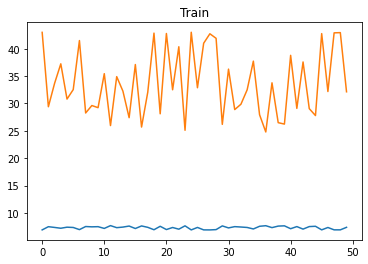

2/2 [==============================] - 1s 10ms/step


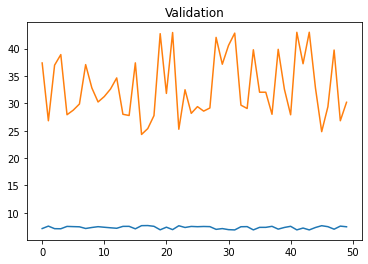

3/3 [==============================] - 0s 4ms/step


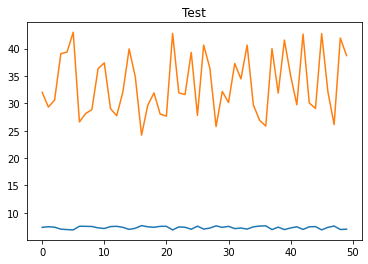

3/3 [==============================] - 0s 35ms/step


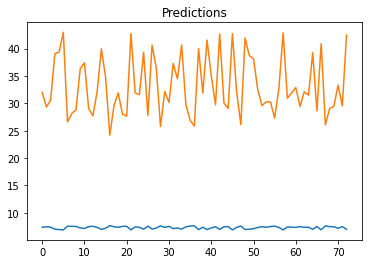

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_gru_mse

698.6636334745245

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 1005.7263 - root_mean_squared_error: 31.7132 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 2s/step - loss: 981.9800 - root_mean_squared_error: 31.3366 - val_loss: 1040.7433 - val_root_mean_squared_error: 32.2606
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 976.8927 - root_mean_squared_error: 31.2553

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 976.8927 - root_mean_squared_error: 31.2553 - val_loss: 1037.2911 - val_root_mean_squared_error: 32.2070
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 988.2837 - root_mean_squared_error: 31.4370

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 974.5455 - root_mean_squared_error: 31.2177 - val_loss: 1033.7404 - val_root_mean_squared_error: 32.1518
Epoch 4/50
4/8 [==============>...............] - ETA: 0s - loss: 987.5167 - root_mean_squared_error: 31.4248 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 970.4119 - root_mean_squared_error: 31.1514 - val_loss: 1030.0991 - val_root_mean_squared_error: 32.0952
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 974.1268 - root_mean_squared_error: 31.2110

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 966.6508 - root_mean_squared_error: 31.0910 - val_loss: 1026.4188 - val_root_mean_squared_error: 32.0378
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 963.9946 - root_mean_squared_error: 31.0483

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 963.9946 - root_mean_squared_error: 31.0483 - val_loss: 1022.7694 - val_root_mean_squared_error: 31.9808
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 974.2459 - root_mean_squared_error: 31.2129

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 960.9675 - root_mean_squared_error: 30.9995 - val_loss: 1019.1147 - val_root_mean_squared_error: 31.9236
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 962.8745 - root_mean_squared_error: 31.0302

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 957.2021 - root_mean_squared_error: 30.9387 - val_loss: 1015.4108 - val_root_mean_squared_error: 31.8655
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 951.3428 - root_mean_squared_error: 30.8438

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 951.3428 - root_mean_squared_error: 30.8438 - val_loss: 1011.5983 - val_root_mean_squared_error: 31.8056
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 950.0806 - root_mean_squared_error: 30.8234

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 950.0806 - root_mean_squared_error: 30.8234 - val_loss: 1007.6883 - val_root_mean_squared_error: 31.7441
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 946.1076 - root_mean_squared_error: 30.7589

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 946.1076 - root_mean_squared_error: 30.7589 - val_loss: 1003.6935 - val_root_mean_squared_error: 31.6811
Epoch 12/50
4/8 [==============>...............] - ETA: 0s - loss: 958.2613 - root_mean_squared_error: 30.9558 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 943.2232 - root_mean_squared_error: 30.7119 - val_loss: 999.6317 - val_root_mean_squared_error: 31.6170
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 921.5730 - root_mean_squared_error: 30.3574

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 938.3995 - root_mean_squared_error: 30.6333 - val_loss: 995.4809 - val_root_mean_squared_error: 31.5512
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 937.1509 - root_mean_squared_error: 30.6129

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 935.7987 - root_mean_squared_error: 30.5908 - val_loss: 991.2292 - val_root_mean_squared_error: 31.4838
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 934.3181 - root_mean_squared_error: 30.5666

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 930.8589 - root_mean_squared_error: 30.5100 - val_loss: 986.8863 - val_root_mean_squared_error: 31.4147
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 990.2643 - root_mean_squared_error: 31.4685

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 922.3870 - root_mean_squared_error: 30.3708 - val_loss: 982.3901 - val_root_mean_squared_error: 31.3431
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 898.3503 - root_mean_squared_error: 29.9725

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 920.8543 - root_mean_squared_error: 30.3456 - val_loss: 977.6955 - val_root_mean_squared_error: 31.2681
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 927.7624 - root_mean_squared_error: 30.4592

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 915.7114 - root_mean_squared_error: 30.2607 - val_loss: 972.8260 - val_root_mean_squared_error: 31.1902
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 956.0621 - root_mean_squared_error: 30.9203

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 911.3145 - root_mean_squared_error: 30.1880 - val_loss: 967.7633 - val_root_mean_squared_error: 31.1089
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 907.7159 - root_mean_squared_error: 30.1283

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 907.7159 - root_mean_squared_error: 30.1283 - val_loss: 962.4883 - val_root_mean_squared_error: 31.0240
Epoch 21/50
4/8 [==============>...............] - ETA: 0s - loss: 858.8131 - root_mean_squared_error: 29.3055

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 901.8689 - root_mean_squared_error: 30.0311 - val_loss: 956.9296 - val_root_mean_squared_error: 30.9343
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 871.0413 - root_mean_squared_error: 29.5134

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 892.7617 - root_mean_squared_error: 29.8791 - val_loss: 951.1180 - val_root_mean_squared_error: 30.8402
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 980.0162 - root_mean_squared_error: 31.3052

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 890.9643 - root_mean_squared_error: 29.8490 - val_loss: 945.0392 - val_root_mean_squared_error: 30.7415
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 882.3146 - root_mean_squared_error: 29.7038

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 882.3146 - root_mean_squared_error: 29.7038 - val_loss: 938.6268 - val_root_mean_squared_error: 30.6370
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 877.3700 - root_mean_squared_error: 29.6204

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 877.3700 - root_mean_squared_error: 29.6204 - val_loss: 931.8865 - val_root_mean_squared_error: 30.5268
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 869.6071 - root_mean_squared_error: 29.4891

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 870.7489 - root_mean_squared_error: 29.5085 - val_loss: 924.8062 - val_root_mean_squared_error: 30.4106
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 866.5194 - root_mean_squared_error: 29.4367

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 863.2352 - root_mean_squared_error: 29.3809 - val_loss: 917.3400 - val_root_mean_squared_error: 30.2876
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 854.7974 - root_mean_squared_error: 29.2369

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 854.7974 - root_mean_squared_error: 29.2369 - val_loss: 909.4659 - val_root_mean_squared_error: 30.1574
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 835.9269 - root_mean_squared_error: 28.9124

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 846.2563 - root_mean_squared_error: 29.0905 - val_loss: 901.1445 - val_root_mean_squared_error: 30.0191
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 840.5515 - root_mean_squared_error: 28.9923

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 840.5515 - root_mean_squared_error: 28.9923 - val_loss: 892.3482 - val_root_mean_squared_error: 29.8722
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 799.6776 - root_mean_squared_error: 28.2786

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 827.8145 - root_mean_squared_error: 28.7718 - val_loss: 883.0701 - val_root_mean_squared_error: 29.7165
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 819.0596 - root_mean_squared_error: 28.6192

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 819.0596 - root_mean_squared_error: 28.6192 - val_loss: 873.3904 - val_root_mean_squared_error: 29.5532
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 808.7382 - root_mean_squared_error: 28.4383

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 808.7382 - root_mean_squared_error: 28.4383 - val_loss: 863.2476 - val_root_mean_squared_error: 29.3811
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 800.9980 - root_mean_squared_error: 28.3019

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 797.4156 - root_mean_squared_error: 28.2385 - val_loss: 852.4483 - val_root_mean_squared_error: 29.1967
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 730.1023 - root_mean_squared_error: 27.0204

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 783.4808 - root_mean_squared_error: 27.9907 - val_loss: 839.7574 - val_root_mean_squared_error: 28.9786
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 778.0073 - root_mean_squared_error: 27.8928

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 772.3870 - root_mean_squared_error: 27.7919 - val_loss: 823.6771 - val_root_mean_squared_error: 28.6998
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 761.5630 - root_mean_squared_error: 27.5964

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 759.7772 - root_mean_squared_error: 27.5641 - val_loss: 806.9366 - val_root_mean_squared_error: 28.4066
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 793.7865 - root_mean_squared_error: 28.1742

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 740.4570 - root_mean_squared_error: 27.2113 - val_loss: 789.6789 - val_root_mean_squared_error: 28.1012
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 725.8237 - root_mean_squared_error: 26.9411

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 725.8237 - root_mean_squared_error: 26.9411 - val_loss: 771.8643 - val_root_mean_squared_error: 27.7824
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 704.3101 - root_mean_squared_error: 26.5388

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 704.3101 - root_mean_squared_error: 26.5388 - val_loss: 753.5775 - val_root_mean_squared_error: 27.4514
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 674.2365 - root_mean_squared_error: 25.9661

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 689.2711 - root_mean_squared_error: 26.2540 - val_loss: 735.1226 - val_root_mean_squared_error: 27.1131
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 743.8846 - root_mean_squared_error: 27.2742

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 675.7199 - root_mean_squared_error: 25.9946 - val_loss: 716.6566 - val_root_mean_squared_error: 26.7704
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 651.9134 - root_mean_squared_error: 25.5326

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 656.9950 - root_mean_squared_error: 25.6319 - val_loss: 698.1310 - val_root_mean_squared_error: 26.4222
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 641.2018 - root_mean_squared_error: 25.3220

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 641.2018 - root_mean_squared_error: 25.3220 - val_loss: 679.7535 - val_root_mean_squared_error: 26.0721
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 686.8097 - root_mean_squared_error: 26.2071

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 631.0317 - root_mean_squared_error: 25.1203 - val_loss: 661.5750 - val_root_mean_squared_error: 25.7211
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 563.9694 - root_mean_squared_error: 23.7480

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 605.0242 - root_mean_squared_error: 24.5972 - val_loss: 643.7103 - val_root_mean_squared_error: 25.3714
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 578.2798 - root_mean_squared_error: 24.0474

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 582.3568 - root_mean_squared_error: 24.1321 - val_loss: 626.2365 - val_root_mean_squared_error: 25.0247
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 571.4401 - root_mean_squared_error: 23.9048

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 571.4401 - root_mean_squared_error: 23.9048 - val_loss: 609.2611 - val_root_mean_squared_error: 24.6832
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 555.3738 - root_mean_squared_error: 23.5664

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 555.3738 - root_mean_squared_error: 23.5664 - val_loss: 593.0375 - val_root_mean_squared_error: 24.3524
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 512.3969 - root_mean_squared_error: 22.6362

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


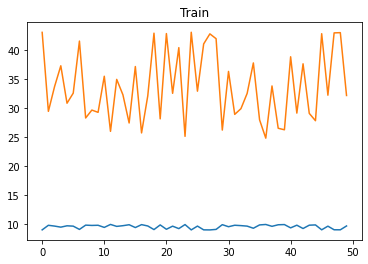

2/2 [==============================] - 2s 5ms/step


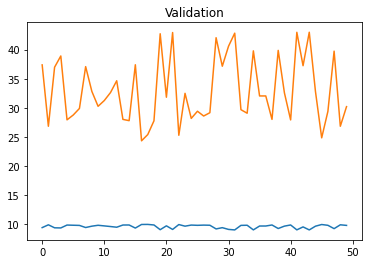

3/3 [==============================] - 0s 3ms/step


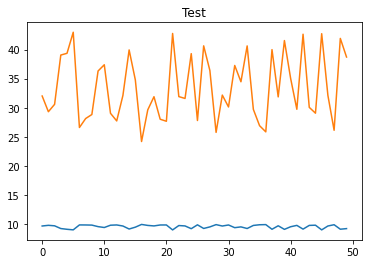

3/3 [==============================] - 0s 5ms/step


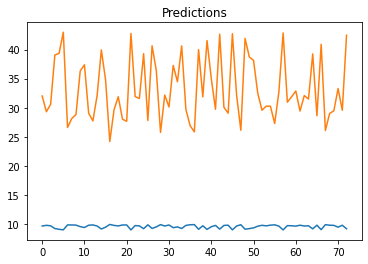

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_lstm_mse

587.1986034163041

### RNN

Epoch 1/50
1/8 [==>...........................] - ETA: 45s - loss: 924.5839 - root_mean_squared_error: 30.4070INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 887ms/step - loss: 908.2162 - root_mean_squared_error: 30.1366 - val_loss: 959.9061 - val_root_mean_squared_error: 30.9824
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 877.2696 - root_mean_squared_error: 29.6187INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 895.2182 - root_mean_squared_error: 29.9202 - val_loss: 951.3452 - val_root_mean_squared_error: 30.8439
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 878.3344 - root_mean_squared_error: 29.6367INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 893.7066 - root_mean_squared_error: 29.8949 - val_loss: 942.7012 - val_root_mean_squared_error: 30.7034
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 890.0827 - root_mean_squared_error: 29.8343INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 890ms/step - loss: 883.6644 - root_mean_squared_error: 29.7265 - val_loss: 933.9674 - val_root_mean_squared_error: 30.5609
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 877.4746 - root_mean_squared_error: 29.6222INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 893ms/step - loss: 876.1967 - root_mean_squared_error: 29.6006 - val_loss: 925.2645 - val_root_mean_squared_error: 30.4182
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 890.9340 - root_mean_squared_error: 29.8485INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 813ms/step - loss: 865.4211 - root_mean_squared_error: 29.4180 - val_loss: 916.5569 - val_root_mean_squared_error: 30.2747
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 846.6047 - root_mean_squared_error: 29.0965INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 813ms/step - loss: 858.6135 - root_mean_squared_error: 29.3021 - val_loss: 907.9103 - val_root_mean_squared_error: 30.1315
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 844.7266 - root_mean_squared_error: 29.0642INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 844.7266 - root_mean_squared_error: 29.0642 - val_loss: 899.2889 - val_root_mean_squared_error: 29.9881
Epoch 9/50
4/8 [==============>...............] - ETA: 0s - loss: 855.2748 - root_mean_squared_error: 29.2451INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 848.6039 - root_mean_squared_error: 29.1308 - val_loss: 890.6511 - val_root_mean_squared_error: 29.8438
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 832.5574 - root_mean_squared_error: 28.8541INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 802ms/step - loss: 832.5574 - root_mean_squared_error: 28.8541 - val_loss: 881.9668 - val_root_mean_squared_error: 29.6979
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 817.2831 - root_mean_squared_error: 28.5882INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 823.7963 - root_mean_squared_error: 28.7019 - val_loss: 873.2284 - val_root_mean_squared_error: 29.5504
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 853.5560 - root_mean_squared_error: 29.2157INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 951ms/step - loss: 821.4964 - root_mean_squared_error: 28.6618 - val_loss: 864.3834 - val_root_mean_squared_error: 29.4004
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 846.0209 - root_mean_squared_error: 29.0864INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 723ms/step - loss: 811.9577 - root_mean_squared_error: 28.4949 - val_loss: 855.6441 - val_root_mean_squared_error: 29.2514
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 771.0391 - root_mean_squared_error: 27.7676INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 659ms/step - loss: 797.6960 - root_mean_squared_error: 28.2435 - val_loss: 847.1287 - val_root_mean_squared_error: 29.1055
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 837.2098 - root_mean_squared_error: 28.9346INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 789.8656 - root_mean_squared_error: 28.1045 - val_loss: 839.0225 - val_root_mean_squared_error: 28.9659
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 780.4800 - root_mean_squared_error: 27.9371INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 858ms/step - loss: 782.5776 - root_mean_squared_error: 27.9746 - val_loss: 831.3035 - val_root_mean_squared_error: 28.8323
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 774.5519 - root_mean_squared_error: 27.8308INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 698ms/step - loss: 778.6790 - root_mean_squared_error: 27.9048 - val_loss: 823.9824 - val_root_mean_squared_error: 28.7051
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 766.2404 - root_mean_squared_error: 27.6810INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 766.2404 - root_mean_squared_error: 27.6810 - val_loss: 817.0536 - val_root_mean_squared_error: 28.5841
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 817.7853 - root_mean_squared_error: 28.5969INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 507ms/step - loss: 763.0436 - root_mean_squared_error: 27.6232 - val_loss: 810.3546 - val_root_mean_squared_error: 28.4667
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 804.8098 - root_mean_squared_error: 28.3692INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 761.4534 - root_mean_squared_error: 27.5944 - val_loss: 803.7266 - val_root_mean_squared_error: 28.3501
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 759.2584 - root_mean_squared_error: 27.5546INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 622ms/step - loss: 757.5681 - root_mean_squared_error: 27.5240 - val_loss: 797.2740 - val_root_mean_squared_error: 28.2360
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 746.5410 - root_mean_squared_error: 27.3229INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 747.0634 - root_mean_squared_error: 27.3325 - val_loss: 790.8393 - val_root_mean_squared_error: 28.1219
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 725.6800 - root_mean_squared_error: 26.9384INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 734.1321 - root_mean_squared_error: 27.0949 - val_loss: 784.4009 - val_root_mean_squared_error: 28.0072
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 674.5415 - root_mean_squared_error: 25.9719INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 828ms/step - loss: 734.0897 - root_mean_squared_error: 27.0941 - val_loss: 777.8187 - val_root_mean_squared_error: 27.8894
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 714.0704 - root_mean_squared_error: 26.7221INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 720.8448 - root_mean_squared_error: 26.8486 - val_loss: 771.1199 - val_root_mean_squared_error: 27.7690
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 723.6001 - root_mean_squared_error: 26.8998INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 723.6001 - root_mean_squared_error: 26.8998 - val_loss: 764.1063 - val_root_mean_squared_error: 27.6425
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 710.4767 - root_mean_squared_error: 26.6548INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 823ms/step - loss: 710.4767 - root_mean_squared_error: 26.6548 - val_loss: 756.8442 - val_root_mean_squared_error: 27.5108
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 668.0060 - root_mean_squared_error: 25.8458INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 782ms/step - loss: 697.1617 - root_mean_squared_error: 26.4038 - val_loss: 749.4476 - val_root_mean_squared_error: 27.3760
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 651.5192 - root_mean_squared_error: 25.5249INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 730ms/step - loss: 703.5967 - root_mean_squared_error: 26.5254 - val_loss: 741.8912 - val_root_mean_squared_error: 27.2377
Epoch 30/50
4/8 [==============>...............] - ETA: 0s - loss: 705.0005 - root_mean_squared_error: 26.5518INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 699ms/step - loss: 681.5543 - root_mean_squared_error: 26.1066 - val_loss: 734.1570 - val_root_mean_squared_error: 27.0953
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 600.1602 - root_mean_squared_error: 24.4982INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 800ms/step - loss: 676.9070 - root_mean_squared_error: 26.0174 - val_loss: 726.1903 - val_root_mean_squared_error: 26.9479
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 678.6105 - root_mean_squared_error: 26.0502INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 678.6105 - root_mean_squared_error: 26.0502 - val_loss: 717.9140 - val_root_mean_squared_error: 26.7939
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 632.2050 - root_mean_squared_error: 25.1437INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 667.1569 - root_mean_squared_error: 25.8294 - val_loss: 709.4246 - val_root_mean_squared_error: 26.6350
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 628.9661 - root_mean_squared_error: 25.0792INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 655.6136 - root_mean_squared_error: 25.6050 - val_loss: 700.8265 - val_root_mean_squared_error: 26.4731
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 630.0740 - root_mean_squared_error: 25.1013INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 672ms/step - loss: 648.9655 - root_mean_squared_error: 25.4748 - val_loss: 692.2599 - val_root_mean_squared_error: 26.3108
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 575.9999 - root_mean_squared_error: 24.0000INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 643.7452 - root_mean_squared_error: 25.3721 - val_loss: 683.7545 - val_root_mean_squared_error: 26.1487
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 616.2214 - root_mean_squared_error: 24.8238INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 631.7259 - root_mean_squared_error: 25.1342 - val_loss: 675.4752 - val_root_mean_squared_error: 25.9899
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 617.0116 - root_mean_squared_error: 24.8397INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 735ms/step - loss: 624.9294 - root_mean_squared_error: 24.9986 - val_loss: 667.6759 - val_root_mean_squared_error: 25.8394
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 596.2543 - root_mean_squared_error: 24.4183INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 809ms/step - loss: 615.6980 - root_mean_squared_error: 24.8133 - val_loss: 660.1837 - val_root_mean_squared_error: 25.6940
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 588.4095 - root_mean_squared_error: 24.2572INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 810ms/step - loss: 606.2225 - root_mean_squared_error: 24.6216 - val_loss: 653.1077 - val_root_mean_squared_error: 25.5560
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 557.4376 - root_mean_squared_error: 23.6101INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 761ms/step - loss: 600.4896 - root_mean_squared_error: 24.5049 - val_loss: 646.2277 - val_root_mean_squared_error: 25.4210
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 528.4222 - root_mean_squared_error: 22.9874INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 589.8215 - root_mean_squared_error: 24.2862 - val_loss: 639.4274 - val_root_mean_squared_error: 25.2869
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 583.3560 - root_mean_squared_error: 24.1528INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 594.4765 - root_mean_squared_error: 24.3819 - val_loss: 632.6567 - val_root_mean_squared_error: 25.1527
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 631.7209 - root_mean_squared_error: 25.1341INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 606ms/step - loss: 587.3825 - root_mean_squared_error: 24.2360 - val_loss: 626.0767 - val_root_mean_squared_error: 25.0215
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 580.2097 - root_mean_squared_error: 24.0875INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 4s 614ms/step - loss: 580.2097 - root_mean_squared_error: 24.0875 - val_loss: 619.6840 - val_root_mean_squared_error: 24.8935
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 624.1858 - root_mean_squared_error: 24.9837INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 864ms/step - loss: 572.1794 - root_mean_squared_error: 23.9203 - val_loss: 613.2361 - val_root_mean_squared_error: 24.7636
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 582.2576 - root_mean_squared_error: 24.1300INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 568.8558 - root_mean_squared_error: 23.8507 - val_loss: 606.6980 - val_root_mean_squared_error: 24.6312
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 500.3036 - root_mean_squared_error: 22.3675INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 651ms/step - loss: 550.5353 - root_mean_squared_error: 23.4635 - val_loss: 599.9617 - val_root_mean_squared_error: 24.4941
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 622.1963 - root_mean_squared_error: 24.9439INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 731ms/step - loss: 555.7654 - root_mean_squared_error: 23.5747 - val_loss: 593.0395 - val_root_mean_squared_error: 24.3524
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 527.8948 - root_mean_squared_error: 22.9760INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 0s 3ms/step


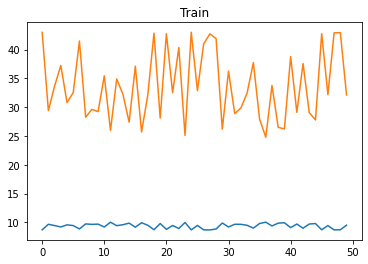

2/2 [==============================] - 1s 23ms/step


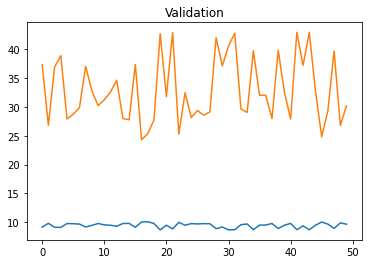

3/3 [==============================] - 0s 4ms/step


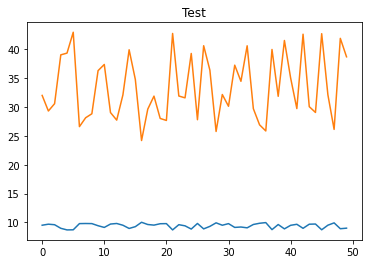

3/3 [==============================] - 0s 3ms/step


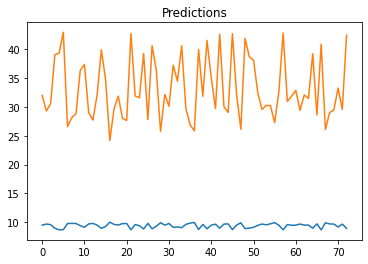

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_rnn_mse

596.0592879270314

# Moving Average with Encoder

### CNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 987.9066 - root_mean_squared_error: 31.4310 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 338ms/step - loss: 983.3342 - root_mean_squared_error: 31.3582 - val_loss: 1098.9125 - val_root_mean_squared_error: 33.1498
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 903.2279 - root_mean_squared_error: 30.0538

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 353ms/step - loss: 874.5930 - root_mean_squared_error: 29.5735 - val_loss: 1029.0155 - val_root_mean_squared_error: 32.0783
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 852.0703 - root_mean_squared_error: 29.1902

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 848.6729 - root_mean_squared_error: 29.1320 - val_loss: 918.6724 - val_root_mean_squared_error: 30.3096
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 763.1232 - root_mean_squared_error: 27.6247

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 314ms/step - loss: 756.2333 - root_mean_squared_error: 27.4997 - val_loss: 791.0990 - val_root_mean_squared_error: 28.1265
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 696.7018 - root_mean_squared_error: 26.3951

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 554ms/step - loss: 660.2866 - root_mean_squared_error: 25.6960 - val_loss: 668.4703 - val_root_mean_squared_error: 25.8548
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 590.3505 - root_mean_squared_error: 24.2971

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 333ms/step - loss: 588.0493 - root_mean_squared_error: 24.2497 - val_loss: 553.8963 - val_root_mean_squared_error: 23.5350
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 549.7533 - root_mean_squared_error: 23.4468

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 326ms/step - loss: 471.6002 - root_mean_squared_error: 21.7164 - val_loss: 446.2950 - val_root_mean_squared_error: 21.1257
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 414.4334 - root_mean_squared_error: 20.3576

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 348ms/step - loss: 410.0124 - root_mean_squared_error: 20.2488 - val_loss: 351.4539 - val_root_mean_squared_error: 18.7471
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 303.1484 - root_mean_squared_error: 17.4112

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 343ms/step - loss: 314.0428 - root_mean_squared_error: 17.7213 - val_loss: 249.0654 - val_root_mean_squared_error: 15.7818
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 264.0724 - root_mean_squared_error: 16.2503

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 5ms/step


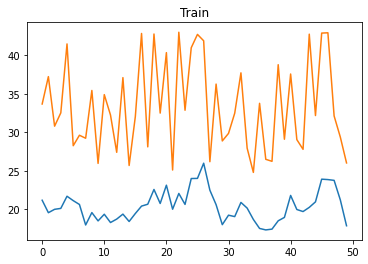

2/2 [==============================] - 0s 4ms/step


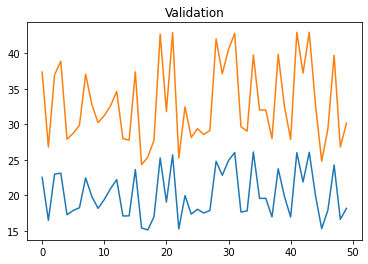

3/3 [==============================] - 0s 13ms/step


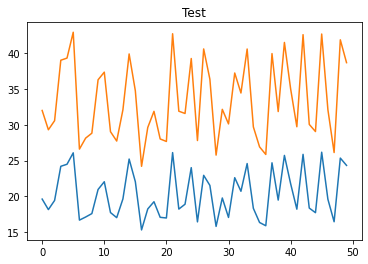

3/3 [==============================] - 0s 13ms/step


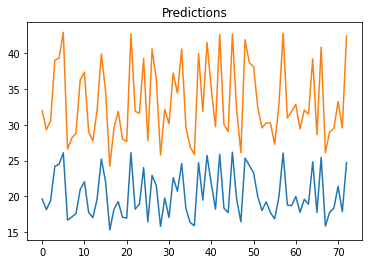

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_cnn_mse

172.54105554564458

### RNN

Epoch 1/10
1/8 [==>...........................] - ETA: 19s - loss: 1009.4301 - root_mean_squared_error: 31.7715INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 507ms/step - loss: 991.1179 - root_mean_squared_error: 31.4820 - val_loss: 1048.1857 - val_root_mean_squared_error: 32.3757
Epoch 2/10
5/8 [=================>............] - ETA: 0s - loss: 1018.7638 - root_mean_squared_error: 31.9181INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 984.2216 - root_mean_squared_error: 31.3723 - val_loss: 1042.9445 - val_root_mean_squared_error: 32.2947
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 1043.0608 - root_mean_squared_error: 32.2965INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 982.5529 - root_mean_squared_error: 31.3457 - val_loss: 1037.6017 - val_root_mean_squared_error: 32.2118
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 1053.6349 - root_mean_squared_error: 32.4597INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 769ms/step - loss: 977.9041 - root_mean_squared_error: 31.2715 - val_loss: 1032.0823 - val_root_mean_squared_error: 32.1260
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 951.5679 - root_mean_squared_error: 30.8475INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 868ms/step - loss: 963.4979 - root_mean_squared_error: 31.0403 - val_loss: 1026.3857 - val_root_mean_squared_error: 32.0373
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 962.8490 - root_mean_squared_error: 31.0298INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 776ms/step - loss: 962.8490 - root_mean_squared_error: 31.0298 - val_loss: 1020.4896 - val_root_mean_squared_error: 31.9451
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 958.4633 - root_mean_squared_error: 30.9591INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 514ms/step - loss: 958.4633 - root_mean_squared_error: 30.9591 - val_loss: 1014.3353 - val_root_mean_squared_error: 31.8486
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 957.1773 - root_mean_squared_error: 30.9383INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 613ms/step - loss: 957.1773 - root_mean_squared_error: 30.9383 - val_loss: 1007.8351 - val_root_mean_squared_error: 31.7464
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 981.0238 - root_mean_squared_error: 31.3213INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 946.6398 - root_mean_squared_error: 30.7675 - val_loss: 1000.9651 - val_root_mean_squared_error: 31.6380
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 934.9323 - root_mean_squared_error: 30.5767INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 3ms/step


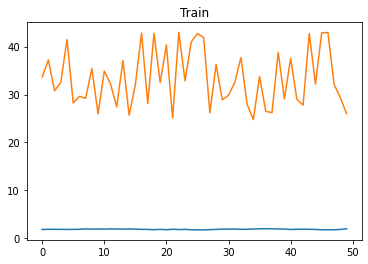

2/2 [==============================] - 0s 5ms/step


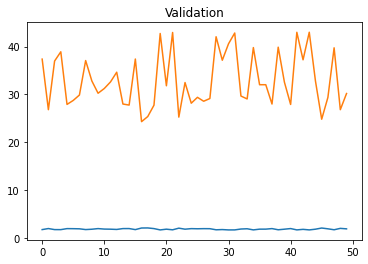

3/3 [==============================] - 0s 11ms/step


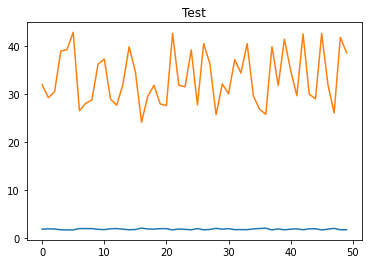

3/3 [==============================] - 0s 18ms/step


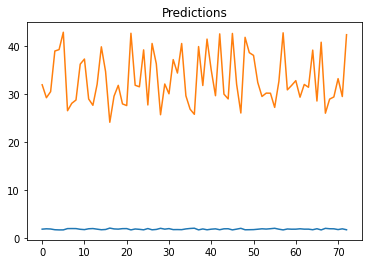

In [29]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_rnn_mse

1007.0410033463054

### GRU

Epoch 1/10
3/8 [==========>...................] - ETA: 0s - loss: 1080.9415 - root_mean_squared_error: 32.8777 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 2s/step - loss: 1090.7319 - root_mean_squared_error: 33.0262 - val_loss: 1155.9457 - val_root_mean_squared_error: 33.9992
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 1083.1735 - root_mean_squared_error: 32.9116

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1085.9512 - root_mean_squared_error: 32.9538 - val_loss: 1148.9563 - val_root_mean_squared_error: 33.8963
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 1078.5164 - root_mean_squared_error: 32.8408

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1073.4922 - root_mean_squared_error: 32.7642 - val_loss: 1142.0099 - val_root_mean_squared_error: 33.7936
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 1070.4424 - root_mean_squared_error: 32.7176

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 1070.4424 - root_mean_squared_error: 32.7176 - val_loss: 1135.1107 - val_root_mean_squared_error: 33.6914
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 1067.8013 - root_mean_squared_error: 32.6772

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1064.9705 - root_mean_squared_error: 32.6339 - val_loss: 1128.2538 - val_root_mean_squared_error: 33.5895
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 1060.3778 - root_mean_squared_error: 32.5634

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1060.5883 - root_mean_squared_error: 32.5667 - val_loss: 1121.3806 - val_root_mean_squared_error: 33.4870
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 1050.4307 - root_mean_squared_error: 32.4103

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1050.4307 - root_mean_squared_error: 32.4103 - val_loss: 1114.4696 - val_root_mean_squared_error: 33.3837
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 1046.5691 - root_mean_squared_error: 32.3507

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1042.9210 - root_mean_squared_error: 32.2943 - val_loss: 1107.5282 - val_root_mean_squared_error: 33.2795
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 1042.8094 - root_mean_squared_error: 32.2926

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 1040.1591 - root_mean_squared_error: 32.2515 - val_loss: 1100.5386 - val_root_mean_squared_error: 33.1744
Epoch 10/10
4/8 [==============>...............] - ETA: 0s - loss: 1015.3196 - root_mean_squared_error: 31.8641

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 12ms/step


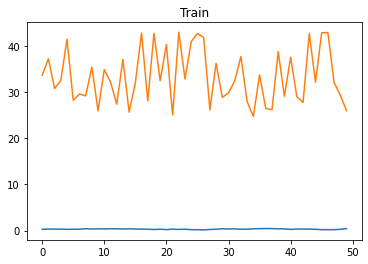

2/2 [==============================] - 1s 7ms/step


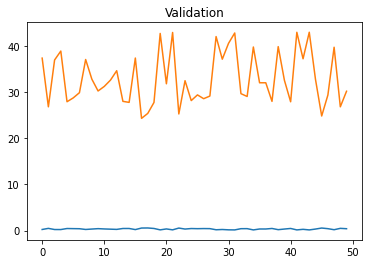

3/3 [==============================] - 0s 11ms/step


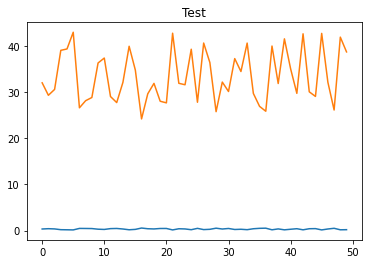

3/3 [==============================] - 0s 8ms/step


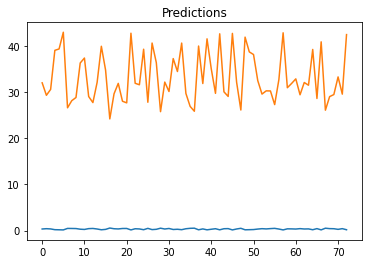

In [31]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_gru_mse

1107.2254560437955

### LSTM

Epoch 1/10
3/8 [==========>...................] - ETA: 0s - loss: 1065.9688 - root_mean_squared_error: 32.6492 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 2s/step - loss: 1058.2272 - root_mean_squared_error: 32.5304 - val_loss: 1122.0024 - val_root_mean_squared_error: 33.4963
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 1051.7727 - root_mean_squared_error: 32.4310

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 1055.1289 - root_mean_squared_error: 32.4827 - val_loss: 1117.9973 - val_root_mean_squared_error: 33.4365
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 1047.3444 - root_mean_squared_error: 32.3627

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 1048.2700 - root_mean_squared_error: 32.3770 - val_loss: 1113.9650 - val_root_mean_squared_error: 33.3761
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 1043.4427 - root_mean_squared_error: 32.3024

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 1043.4427 - root_mean_squared_error: 32.3024 - val_loss: 1109.9374 - val_root_mean_squared_error: 33.3157
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 1043.5485 - root_mean_squared_error: 32.3040

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1040.7247 - root_mean_squared_error: 32.2603 - val_loss: 1105.8845 - val_root_mean_squared_error: 33.2548
Epoch 6/10
4/8 [==============>...............] - ETA: 0s - loss: 1061.0294 - root_mean_squared_error: 32.5734

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 1038.1942 - root_mean_squared_error: 32.2210 - val_loss: 1101.7751 - val_root_mean_squared_error: 33.1930
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 1059.0189 - root_mean_squared_error: 32.5426

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 1032.9314 - root_mean_squared_error: 32.1393 - val_loss: 1097.5679 - val_root_mean_squared_error: 33.1296
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 1019.3063 - root_mean_squared_error: 31.9266

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 1031.5776 - root_mean_squared_error: 32.1182 - val_loss: 1093.2733 - val_root_mean_squared_error: 33.0647
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 1044.5862 - root_mean_squared_error: 32.3201

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 1023.4455 - root_mean_squared_error: 31.9913 - val_loss: 1088.8729 - val_root_mean_squared_error: 32.9981
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 1018.4769 - root_mean_squared_error: 31.9136

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 1s 5ms/step


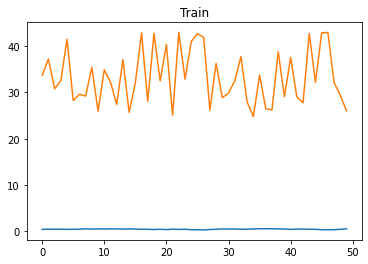

2/2 [==============================] - 1s 22ms/step


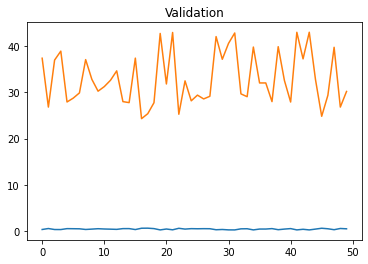

3/3 [==============================] - 0s 9ms/step


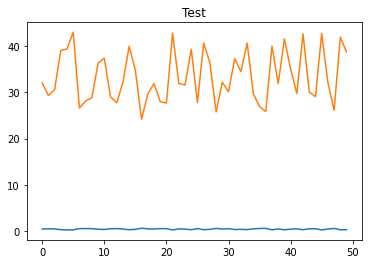

3/3 [==============================] - 0s 4ms/step


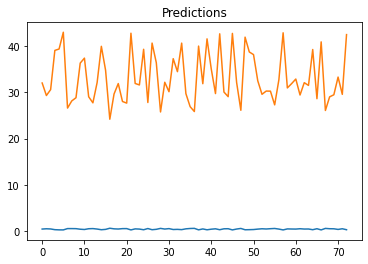

In [33]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_lstm_mse

1098.086932806549

# Hybrid

## General

### CNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1083.2910 - root_mean_squared_error: 32.9134

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 3s/step - loss: 1088.1271 - root_mean_squared_error: 32.9868 - val_loss: 1137.6688 - val_root_mean_squared_error: 33.7293
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1064.6022 - root_mean_squared_error: 32.6282

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1064.6022 - root_mean_squared_error: 32.6282 - val_loss: 1113.1051 - val_root_mean_squared_error: 33.3632
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1040.8367 - root_mean_squared_error: 32.2620

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1040.8367 - root_mean_squared_error: 32.2620 - val_loss: 1089.0741 - val_root_mean_squared_error: 33.0011
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1018.0817 - root_mean_squared_error: 31.9074

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1018.0817 - root_mean_squared_error: 31.9074 - val_loss: 1066.1403 - val_root_mean_squared_error: 32.6518
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 995.4554 - root_mean_squared_error: 31.5508

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 995.4554 - root_mean_squared_error: 31.5508 - val_loss: 1041.4718 - val_root_mean_squared_error: 32.2718
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 973.9150 - root_mean_squared_error: 31.2076 

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 971.0539 - root_mean_squared_error: 31.1617 - val_loss: 1016.5199 - val_root_mean_squared_error: 31.8829
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 947.9412 - root_mean_squared_error: 30.7887

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 947.9412 - root_mean_squared_error: 30.7887 - val_loss: 994.4227 - val_root_mean_squared_error: 31.5345
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 926.1279 - root_mean_squared_error: 30.4323

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 927.1782 - root_mean_squared_error: 30.4496 - val_loss: 974.1967 - val_root_mean_squared_error: 31.2121
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 911.7968 - root_mean_squared_error: 30.1960

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 908.0417 - root_mean_squared_error: 30.1337 - val_loss: 955.4185 - val_root_mean_squared_error: 30.9098
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 890.2994 - root_mean_squared_error: 29.8379

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 890.2994 - root_mean_squared_error: 29.8379 - val_loss: 937.8232 - val_root_mean_squared_error: 30.6239
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 863.8951 - root_mean_squared_error: 29.3921

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 873.5177 - root_mean_squared_error: 29.5553 - val_loss: 920.9516 - val_root_mean_squared_error: 30.3472
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 857.3506 - root_mean_squared_error: 29.2806

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 857.3506 - root_mean_squared_error: 29.2806 - val_loss: 904.7443 - val_root_mean_squared_error: 30.0790
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 839.7324 - root_mean_squared_error: 28.9781

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 841.9357 - root_mean_squared_error: 29.0161 - val_loss: 889.2330 - val_root_mean_squared_error: 29.8200
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 834.6702 - root_mean_squared_error: 28.8907

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 827.2149 - root_mean_squared_error: 28.7613 - val_loss: 874.1682 - val_root_mean_squared_error: 29.5663
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 812.7811 - root_mean_squared_error: 28.5093

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 812.7811 - root_mean_squared_error: 28.5093 - val_loss: 859.3614 - val_root_mean_squared_error: 29.3149
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 797.3829 - root_mean_squared_error: 28.2380

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 798.3392 - root_mean_squared_error: 28.2549 - val_loss: 844.4537 - val_root_mean_squared_error: 29.0595
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 780.5539 - root_mean_squared_error: 27.9384

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 783.8262 - root_mean_squared_error: 27.9969 - val_loss: 829.4677 - val_root_mean_squared_error: 28.8005
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 768.7409 - root_mean_squared_error: 27.7262

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 769.3829 - root_mean_squared_error: 27.7378 - val_loss: 814.5629 - val_root_mean_squared_error: 28.5405
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 741.6949 - root_mean_squared_error: 27.2341

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 755.1011 - root_mean_squared_error: 27.4791 - val_loss: 800.1052 - val_root_mean_squared_error: 28.2861
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 741.4243 - root_mean_squared_error: 27.2291

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 741.4243 - root_mean_squared_error: 27.2291 - val_loss: 786.2655 - val_root_mean_squared_error: 28.0404
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 722.6985 - root_mean_squared_error: 26.8831

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 728.4565 - root_mean_squared_error: 26.9899 - val_loss: 773.5405 - val_root_mean_squared_error: 27.8126
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 717.4453 - root_mean_squared_error: 26.7852

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 716.6581 - root_mean_squared_error: 26.7705 - val_loss: 761.8463 - val_root_mean_squared_error: 27.6016
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 705.2495 - root_mean_squared_error: 26.5565

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 705.8870 - root_mean_squared_error: 26.5685 - val_loss: 751.2697 - val_root_mean_squared_error: 27.4093
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 694.3629 - root_mean_squared_error: 26.3508

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 696.0833 - root_mean_squared_error: 26.3834 - val_loss: 741.6948 - val_root_mean_squared_error: 27.2341
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 686.3568 - root_mean_squared_error: 26.1984

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 687.2317 - root_mean_squared_error: 26.2151 - val_loss: 732.9416 - val_root_mean_squared_error: 27.0729
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 679.1023 - root_mean_squared_error: 26.0596

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 679.1023 - root_mean_squared_error: 26.0596 - val_loss: 724.9154 - val_root_mean_squared_error: 26.9243
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 675.3231 - root_mean_squared_error: 25.9870

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 671.6159 - root_mean_squared_error: 25.9156 - val_loss: 717.5040 - val_root_mean_squared_error: 26.7863
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 666.1600 - root_mean_squared_error: 25.8101

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 664.6849 - root_mean_squared_error: 25.7815 - val_loss: 710.6463 - val_root_mean_squared_error: 26.6579
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 651.2643 - root_mean_squared_error: 25.5199

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 658.2544 - root_mean_squared_error: 25.6565 - val_loss: 704.1877 - val_root_mean_squared_error: 26.5365
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 655.5705 - root_mean_squared_error: 25.6041

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 652.1151 - root_mean_squared_error: 25.5365 - val_loss: 697.8496 - val_root_mean_squared_error: 26.4168
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 643.4191 - root_mean_squared_error: 25.3657

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 646.0417 - root_mean_squared_error: 25.4174 - val_loss: 691.7618 - val_root_mean_squared_error: 26.3014
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 642.6370 - root_mean_squared_error: 25.3503

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 640.4674 - root_mean_squared_error: 25.3075 - val_loss: 686.3455 - val_root_mean_squared_error: 26.1982
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 638.3314 - root_mean_squared_error: 25.2652

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 635.3889 - root_mean_squared_error: 25.2069 - val_loss: 681.2584 - val_root_mean_squared_error: 26.1009
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 630.6073 - root_mean_squared_error: 25.1119

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 630.6073 - root_mean_squared_error: 25.1119 - val_loss: 676.4506 - val_root_mean_squared_error: 26.0087
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 626.3448 - root_mean_squared_error: 25.0269

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 626.0573 - root_mean_squared_error: 25.0211 - val_loss: 671.9285 - val_root_mean_squared_error: 25.9216
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 620.7701 - root_mean_squared_error: 24.9153

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 621.8038 - root_mean_squared_error: 24.9360 - val_loss: 667.6383 - val_root_mean_squared_error: 25.8387
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 617.7748 - root_mean_squared_error: 24.8551

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 617.7748 - root_mean_squared_error: 24.8551 - val_loss: 663.5618 - val_root_mean_squared_error: 25.7597
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 615.4511 - root_mean_squared_error: 24.8083

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 613.9250 - root_mean_squared_error: 24.7775 - val_loss: 659.7214 - val_root_mean_squared_error: 25.6850
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 609.1494 - root_mean_squared_error: 24.6810

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 610.3045 - root_mean_squared_error: 24.7043 - val_loss: 656.0630 - val_root_mean_squared_error: 25.6137
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 602.2608 - root_mean_squared_error: 24.5410

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 606.8618 - root_mean_squared_error: 24.6346 - val_loss: 652.5527 - val_root_mean_squared_error: 25.5451
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 603.5261 - root_mean_squared_error: 24.5668

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 603.5261 - root_mean_squared_error: 24.5668 - val_loss: 649.1934 - val_root_mean_squared_error: 25.4793
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 597.9297 - root_mean_squared_error: 24.4526

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 600.3371 - root_mean_squared_error: 24.5018 - val_loss: 645.9752 - val_root_mean_squared_error: 25.4160
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 597.2939 - root_mean_squared_error: 24.4396

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 597.2939 - root_mean_squared_error: 24.4396 - val_loss: 642.8787 - val_root_mean_squared_error: 25.3551
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 594.3443 - root_mean_squared_error: 24.3792

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 594.3443 - root_mean_squared_error: 24.3792 - val_loss: 639.9009 - val_root_mean_squared_error: 25.2963
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 588.4160 - root_mean_squared_error: 24.2573

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 591.4943 - root_mean_squared_error: 24.3207 - val_loss: 636.9679 - val_root_mean_squared_error: 25.2382
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 588.6921 - root_mean_squared_error: 24.2630

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 588.6921 - root_mean_squared_error: 24.2630 - val_loss: 634.0900 - val_root_mean_squared_error: 25.1811
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 592.4206 - root_mean_squared_error: 24.3397

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 585.9697 - root_mean_squared_error: 24.2068 - val_loss: 631.2891 - val_root_mean_squared_error: 25.1255
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 583.3271 - root_mean_squared_error: 24.1522

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 583.3271 - root_mean_squared_error: 24.1522 - val_loss: 628.6490 - val_root_mean_squared_error: 25.0729
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 582.6326 - root_mean_squared_error: 24.1378

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 580.8304 - root_mean_squared_error: 24.1004 - val_loss: 626.1198 - val_root_mean_squared_error: 25.0224
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 579.7638 - root_mean_squared_error: 24.0783

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 4s 17ms/step


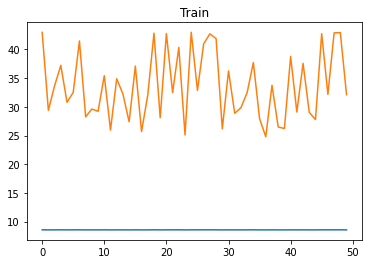

2/2 [==============================] - 4s 9ms/step


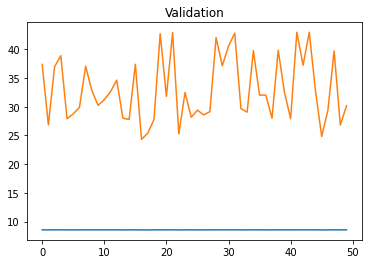

3/3 [==============================] - 0s 23ms/step


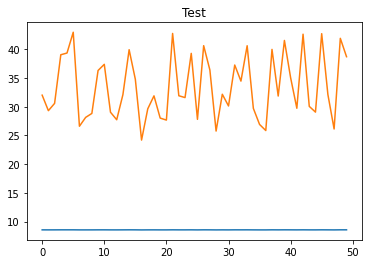

3/3 [==============================] - 0s 32ms/step


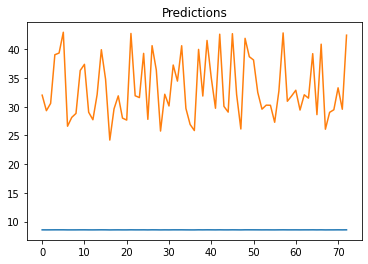

In [35]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_lstm_mse

633.6447930364451

### RNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1026.2812 - root_mean_squared_error: 32.0356 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 35s 4s/step - loss: 1025.6331 - root_mean_squared_error: 32.0255 - val_loss: 1080.1437 - val_root_mean_squared_error: 32.8655
Epoch 2/50
4/8 [==============>...............] - ETA: 0s - loss: 985.6200 - root_mean_squared_error: 31.3946

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 1012.7657 - root_mean_squared_error: 31.8240 - val_loss: 1066.8220 - val_root_mean_squared_error: 32.6622
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 992.7827 - root_mean_squared_error: 31.5085

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 999.7916 - root_mean_squared_error: 31.6195 - val_loss: 1053.3564 - val_root_mean_squared_error: 32.4555
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 999.1007 - root_mean_squared_error: 31.6086 

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 986.7259 - root_mean_squared_error: 31.4122 - val_loss: 1039.7574 - val_root_mean_squared_error: 32.2453
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 973.7882 - root_mean_squared_error: 31.2056

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 973.5639 - root_mean_squared_error: 31.2020 - val_loss: 1026.2542 - val_root_mean_squared_error: 32.0352
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 981.3195 - root_mean_squared_error: 31.3260

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 960.5596 - root_mean_squared_error: 30.9929 - val_loss: 1012.9279 - val_root_mean_squared_error: 31.8265
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 947.7606 - root_mean_squared_error: 30.7857

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 947.7606 - root_mean_squared_error: 30.7857 - val_loss: 999.8659 - val_root_mean_squared_error: 31.6207
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 935.3045 - root_mean_squared_error: 30.5827

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 935.3045 - root_mean_squared_error: 30.5827 - val_loss: 987.1703 - val_root_mean_squared_error: 31.4193
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 923.1224 - root_mean_squared_error: 30.3829

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 923.1224 - root_mean_squared_error: 30.3829 - val_loss: 974.8949 - val_root_mean_squared_error: 31.2233
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 911.4038 - root_mean_squared_error: 30.1895

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 911.4038 - root_mean_squared_error: 30.1895 - val_loss: 963.0129 - val_root_mean_squared_error: 31.0324
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 900.0814 - root_mean_squared_error: 30.0014

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 900.0814 - root_mean_squared_error: 30.0014 - val_loss: 951.4698 - val_root_mean_squared_error: 30.8459
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 889.0311 - root_mean_squared_error: 29.8166

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 889.0311 - root_mean_squared_error: 29.8166 - val_loss: 940.2123 - val_root_mean_squared_error: 30.6629
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 875.3565 - root_mean_squared_error: 29.5864

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 878.2715 - root_mean_squared_error: 29.6356 - val_loss: 929.2759 - val_root_mean_squared_error: 30.4840
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 873.2625 - root_mean_squared_error: 29.5510

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 867.7865 - root_mean_squared_error: 29.4582 - val_loss: 918.5308 - val_root_mean_squared_error: 30.3073
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 857.4370 - root_mean_squared_error: 29.2820

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 857.4370 - root_mean_squared_error: 29.2820 - val_loss: 907.9592 - val_root_mean_squared_error: 30.1324
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 856.1990 - root_mean_squared_error: 29.2609

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 847.2612 - root_mean_squared_error: 29.1078 - val_loss: 897.5222 - val_root_mean_squared_error: 29.9587
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 837.1915 - root_mean_squared_error: 28.9343

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 837.1915 - root_mean_squared_error: 28.9343 - val_loss: 887.2789 - val_root_mean_squared_error: 29.7872
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 835.4901 - root_mean_squared_error: 28.9048

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 827.4211 - root_mean_squared_error: 28.7649 - val_loss: 877.2498 - val_root_mean_squared_error: 29.6184
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 817.7993 - root_mean_squared_error: 28.5972

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 817.7993 - root_mean_squared_error: 28.5972 - val_loss: 867.4146 - val_root_mean_squared_error: 29.4519
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 813.1620 - root_mean_squared_error: 28.5160

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 808.3306 - root_mean_squared_error: 28.4312 - val_loss: 857.7083 - val_root_mean_squared_error: 29.2867
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 799.0283 - root_mean_squared_error: 28.2671

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 799.0283 - root_mean_squared_error: 28.2671 - val_loss: 848.2706 - val_root_mean_squared_error: 29.1251
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 805.0222 - root_mean_squared_error: 28.3729

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 790.0218 - root_mean_squared_error: 28.1073 - val_loss: 839.0401 - val_root_mean_squared_error: 28.9662
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 809.8685 - root_mean_squared_error: 28.4582

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 781.2164 - root_mean_squared_error: 27.9502 - val_loss: 830.0864 - val_root_mean_squared_error: 28.8112
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 778.8322 - root_mean_squared_error: 27.9076

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 772.6363 - root_mean_squared_error: 27.7963 - val_loss: 821.4436 - val_root_mean_squared_error: 28.6608
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 759.8279 - root_mean_squared_error: 27.5650

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 764.3914 - root_mean_squared_error: 27.6476 - val_loss: 813.1088 - val_root_mean_squared_error: 28.5151
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 742.0693 - root_mean_squared_error: 27.2409

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 756.4706 - root_mean_squared_error: 27.5040 - val_loss: 805.0358 - val_root_mean_squared_error: 28.3732
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 751.8133 - root_mean_squared_error: 27.4192

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 748.7870 - root_mean_squared_error: 27.3640 - val_loss: 797.2784 - val_root_mean_squared_error: 28.2361
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 741.3542 - root_mean_squared_error: 27.2278

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 741.3542 - root_mean_squared_error: 27.2278 - val_loss: 789.8556 - val_root_mean_squared_error: 28.1044
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 726.9821 - root_mean_squared_error: 26.9626

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 734.3362 - root_mean_squared_error: 27.0986 - val_loss: 782.7025 - val_root_mean_squared_error: 27.9768
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 712.5721 - root_mean_squared_error: 26.6940

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 727.5204 - root_mean_squared_error: 26.9726 - val_loss: 775.8726 - val_root_mean_squared_error: 27.8545
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 718.2036 - root_mean_squared_error: 26.7993

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 721.0306 - root_mean_squared_error: 26.8520 - val_loss: 769.4407 - val_root_mean_squared_error: 27.7388
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 710.8514 - root_mean_squared_error: 26.6618

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 714.9924 - root_mean_squared_error: 26.7393 - val_loss: 763.3393 - val_root_mean_squared_error: 27.6286
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 709.6639 - root_mean_squared_error: 26.6395

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 709.2164 - root_mean_squared_error: 26.6311 - val_loss: 757.5913 - val_root_mean_squared_error: 27.5244
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 703.7919 - root_mean_squared_error: 26.5291

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 703.7919 - root_mean_squared_error: 26.5291 - val_loss: 752.1355 - val_root_mean_squared_error: 27.4251
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 698.6296 - root_mean_squared_error: 26.4316

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 698.6296 - root_mean_squared_error: 26.4316 - val_loss: 746.9705 - val_root_mean_squared_error: 27.3308
Epoch 36/50
4/8 [==============>...............] - ETA: 0s - loss: 709.5894 - root_mean_squared_error: 26.6381

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 693.7551 - root_mean_squared_error: 26.3392 - val_loss: 742.0349 - val_root_mean_squared_error: 27.2403
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 694.8642 - root_mean_squared_error: 26.3603

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 689.1136 - root_mean_squared_error: 26.2510 - val_loss: 737.3588 - val_root_mean_squared_error: 27.1544
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 684.6949 - root_mean_squared_error: 26.1667

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 684.6949 - root_mean_squared_error: 26.1667 - val_loss: 732.9433 - val_root_mean_squared_error: 27.0729
Epoch 39/50
4/8 [==============>...............] - ETA: 0s - loss: 650.9943 - root_mean_squared_error: 25.5146

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 680.4896 - root_mean_squared_error: 26.0862 - val_loss: 728.7245 - val_root_mean_squared_error: 26.9949
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 676.4888 - root_mean_squared_error: 26.0094

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 676.4888 - root_mean_squared_error: 26.0094 - val_loss: 724.6362 - val_root_mean_squared_error: 26.9191
Epoch 41/50
4/8 [==============>...............] - ETA: 0s - loss: 663.5264 - root_mean_squared_error: 25.7590

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 672.6044 - root_mean_squared_error: 25.9346 - val_loss: 720.7158 - val_root_mean_squared_error: 26.8461
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 668.1517 - root_mean_squared_error: 25.8486

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 668.8895 - root_mean_squared_error: 25.8629 - val_loss: 716.9577 - val_root_mean_squared_error: 26.7761
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 665.3229 - root_mean_squared_error: 25.7939

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 665.3229 - root_mean_squared_error: 25.7939 - val_loss: 713.3217 - val_root_mean_squared_error: 26.7081
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 667.3399 - root_mean_squared_error: 25.8329

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 661.8730 - root_mean_squared_error: 25.7269 - val_loss: 709.8334 - val_root_mean_squared_error: 26.6427
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 658.5833 - root_mean_squared_error: 25.6629

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 658.5833 - root_mean_squared_error: 25.6629 - val_loss: 706.4791 - val_root_mean_squared_error: 26.5797
Epoch 46/50
4/8 [==============>...............] - ETA: 0s - loss: 663.8024 - root_mean_squared_error: 25.7644

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 655.4078 - root_mean_squared_error: 25.6009 - val_loss: 703.2711 - val_root_mean_squared_error: 26.5193
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 662.6113 - root_mean_squared_error: 25.7412

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 652.3535 - root_mean_squared_error: 25.5412 - val_loss: 700.1500 - val_root_mean_squared_error: 26.4603
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 649.0986 - root_mean_squared_error: 25.4774

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 649.3986 - root_mean_squared_error: 25.4833 - val_loss: 697.1597 - val_root_mean_squared_error: 26.4038
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 646.5613 - root_mean_squared_error: 25.4276

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 646.5613 - root_mean_squared_error: 25.4276 - val_loss: 694.2761 - val_root_mean_squared_error: 26.3491
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 643.8139 - root_mean_squared_error: 25.3735

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 11ms/step


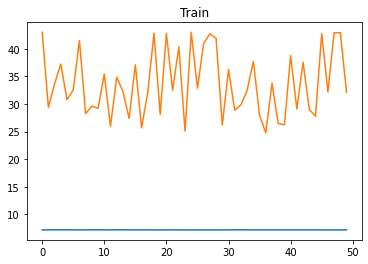

2/2 [==============================] - 2s 10ms/step


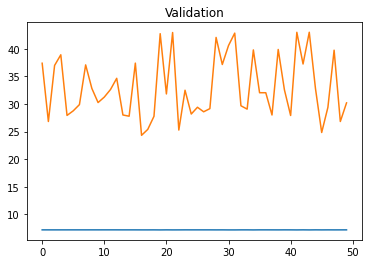

3/3 [==============================] - 0s 15ms/step


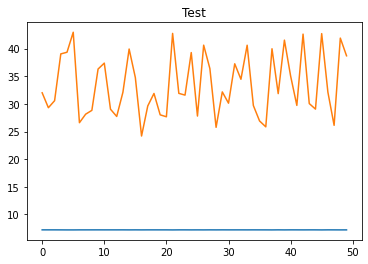

3/3 [==============================] - 0s 17ms/step


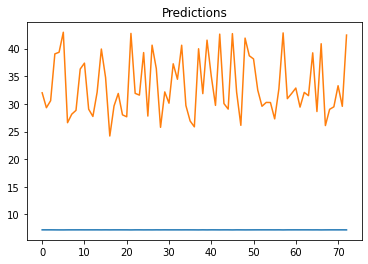

In [37]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_rnn_lstm_mse

702.0617949355507

### RNN GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 960.7404 - root_mean_squared_error: 30.9958

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 3s/step - loss: 969.3794 - root_mean_squared_error: 31.1349 - val_loss: 1019.7640 - val_root_mean_squared_error: 31.9337
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 952.3987 - root_mean_squared_error: 30.8610

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 952.3987 - root_mean_squared_error: 30.8610 - val_loss: 1002.4454 - val_root_mean_squared_error: 31.6614
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 935.6757 - root_mean_squared_error: 30.5888

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 935.6757 - root_mean_squared_error: 30.5888 - val_loss: 985.4002 - val_root_mean_squared_error: 31.3911
Epoch 4/50
4/8 [==============>...............] - ETA: 0s - loss: 904.3981 - root_mean_squared_error: 30.0732

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 919.2266 - root_mean_squared_error: 30.3188 - val_loss: 968.6397 - val_root_mean_squared_error: 31.1230
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 903.1057 - root_mean_squared_error: 30.0517

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 903.1057 - root_mean_squared_error: 30.0517 - val_loss: 952.1793 - val_root_mean_squared_error: 30.8574
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 887.3520 - root_mean_squared_error: 29.7885

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 887.3520 - root_mean_squared_error: 29.7885 - val_loss: 936.1041 - val_root_mean_squared_error: 30.5958
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 872.7622 - root_mean_squared_error: 29.5425

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 871.9033 - root_mean_squared_error: 29.5280 - val_loss: 920.5007 - val_root_mean_squared_error: 30.3398
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 857.0688 - root_mean_squared_error: 29.2757

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 857.0688 - root_mean_squared_error: 29.2757 - val_loss: 905.3906 - val_root_mean_squared_error: 30.0897
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 840.3527 - root_mean_squared_error: 28.9888

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 842.6608 - root_mean_squared_error: 29.0286 - val_loss: 890.9161 - val_root_mean_squared_error: 29.8482
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 844.7043 - root_mean_squared_error: 29.0638

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 828.9394 - root_mean_squared_error: 28.7913 - val_loss: 876.9981 - val_root_mean_squared_error: 29.6142
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 819.6862 - root_mean_squared_error: 28.6302

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 815.7600 - root_mean_squared_error: 28.5615 - val_loss: 863.6969 - val_root_mean_squared_error: 29.3887
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 803.1788 - root_mean_squared_error: 28.3404

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 803.1788 - root_mean_squared_error: 28.3404 - val_loss: 850.9819 - val_root_mean_squared_error: 29.1716
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 796.8985 - root_mean_squared_error: 28.2294

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 791.0930 - root_mean_squared_error: 28.1264 - val_loss: 838.8814 - val_root_mean_squared_error: 28.9634
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 785.1370 - root_mean_squared_error: 28.0203

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 779.6750 - root_mean_squared_error: 27.9227 - val_loss: 827.3184 - val_root_mean_squared_error: 28.7631
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 768.7542 - root_mean_squared_error: 27.7264

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 768.7542 - root_mean_squared_error: 27.7264 - val_loss: 816.2119 - val_root_mean_squared_error: 28.5694
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 749.9030 - root_mean_squared_error: 27.3844

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 758.1642 - root_mean_squared_error: 27.5348 - val_loss: 805.5991 - val_root_mean_squared_error: 28.3831
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 767.9615 - root_mean_squared_error: 27.7121

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 748.1702 - root_mean_squared_error: 27.3527 - val_loss: 795.4438 - val_root_mean_squared_error: 28.2036
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 738.4905 - root_mean_squared_error: 27.1752

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 738.4905 - root_mean_squared_error: 27.1752 - val_loss: 785.8091 - val_root_mean_squared_error: 28.0323
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 729.3845 - root_mean_squared_error: 27.0071

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 729.3845 - root_mean_squared_error: 27.0071 - val_loss: 776.5813 - val_root_mean_squared_error: 27.8672
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 714.8218 - root_mean_squared_error: 26.7362

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 720.6848 - root_mean_squared_error: 26.8456 - val_loss: 767.9236 - val_root_mean_squared_error: 27.7114
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 722.7958 - root_mean_squared_error: 26.8849

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 712.6204 - root_mean_squared_error: 26.6950 - val_loss: 759.8297 - val_root_mean_squared_error: 27.5650
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 712.1669 - root_mean_squared_error: 26.6865

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 705.0467 - root_mean_squared_error: 26.5527 - val_loss: 752.4507 - val_root_mean_squared_error: 27.4308
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 711.2079 - root_mean_squared_error: 26.6685

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 698.1666 - root_mean_squared_error: 26.4228 - val_loss: 745.6069 - val_root_mean_squared_error: 27.3058
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 699.6325 - root_mean_squared_error: 26.4506

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 691.7702 - root_mean_squared_error: 26.3015 - val_loss: 739.3085 - val_root_mean_squared_error: 27.1902
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 701.2990 - root_mean_squared_error: 26.4820

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 685.9041 - root_mean_squared_error: 26.1898 - val_loss: 733.5159 - val_root_mean_squared_error: 27.0835
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 672.8596 - root_mean_squared_error: 25.9395

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 680.4606 - root_mean_squared_error: 26.0856 - val_loss: 728.1992 - val_root_mean_squared_error: 26.9852
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 669.7129 - root_mean_squared_error: 25.8788

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 675.4877 - root_mean_squared_error: 25.9901 - val_loss: 723.2007 - val_root_mean_squared_error: 26.8924
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 671.1201 - root_mean_squared_error: 25.9060

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 670.7955 - root_mean_squared_error: 25.8997 - val_loss: 718.5189 - val_root_mean_squared_error: 26.8052
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 679.2102 - root_mean_squared_error: 26.0617

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 666.4027 - root_mean_squared_error: 25.8148 - val_loss: 714.1390 - val_root_mean_squared_error: 26.7234
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 665.4341 - root_mean_squared_error: 25.7960

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 662.3168 - root_mean_squared_error: 25.7355 - val_loss: 710.0701 - val_root_mean_squared_error: 26.6471
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 662.3357 - root_mean_squared_error: 25.7359

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 658.4881 - root_mean_squared_error: 25.6610 - val_loss: 706.2620 - val_root_mean_squared_error: 26.5756
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 656.0584 - root_mean_squared_error: 25.6136

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 654.8887 - root_mean_squared_error: 25.5908 - val_loss: 702.6649 - val_root_mean_squared_error: 26.5078
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 653.1871 - root_mean_squared_error: 25.5575

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 651.4935 - root_mean_squared_error: 25.5244 - val_loss: 699.2433 - val_root_mean_squared_error: 26.4432
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 651.9756 - root_mean_squared_error: 25.5338

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 648.2816 - root_mean_squared_error: 25.4614 - val_loss: 696.0300 - val_root_mean_squared_error: 26.3824
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 637.7961 - root_mean_squared_error: 25.2546

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 645.2588 - root_mean_squared_error: 25.4019 - val_loss: 693.0045 - val_root_mean_squared_error: 26.3250
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 642.4026 - root_mean_squared_error: 25.3457

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 642.4026 - root_mean_squared_error: 25.3457 - val_loss: 690.1094 - val_root_mean_squared_error: 26.2699
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 636.6718 - root_mean_squared_error: 25.2324

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 639.6843 - root_mean_squared_error: 25.2920 - val_loss: 687.3669 - val_root_mean_squared_error: 26.2177
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 642.2564 - root_mean_squared_error: 25.3428

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 637.1255 - root_mean_squared_error: 25.2413 - val_loss: 684.7577 - val_root_mean_squared_error: 26.1679
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 633.9806 - root_mean_squared_error: 25.1790

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 634.6786 - root_mean_squared_error: 25.1928 - val_loss: 682.3111 - val_root_mean_squared_error: 26.1211
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 631.0009 - root_mean_squared_error: 25.1197

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 632.3696 - root_mean_squared_error: 25.1470 - val_loss: 679.9597 - val_root_mean_squared_error: 26.0760
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 638.4208 - root_mean_squared_error: 25.2670

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 630.1476 - root_mean_squared_error: 25.1027 - val_loss: 677.6868 - val_root_mean_squared_error: 26.0324
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 651.7906 - root_mean_squared_error: 25.5302

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 628.0085 - root_mean_squared_error: 25.0601 - val_loss: 675.4936 - val_root_mean_squared_error: 25.9903
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 630.6118 - root_mean_squared_error: 25.1120

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 625.9189 - root_mean_squared_error: 25.0184 - val_loss: 673.3767 - val_root_mean_squared_error: 25.9495
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 623.9100 - root_mean_squared_error: 24.9782

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 623.9100 - root_mean_squared_error: 24.9782 - val_loss: 671.3233 - val_root_mean_squared_error: 25.9099
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 621.7556 - root_mean_squared_error: 24.9350

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 621.9567 - root_mean_squared_error: 24.9391 - val_loss: 669.3146 - val_root_mean_squared_error: 25.8711
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 617.2292 - root_mean_squared_error: 24.8441

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 620.0495 - root_mean_squared_error: 24.9008 - val_loss: 667.3455 - val_root_mean_squared_error: 25.8330
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 618.1718 - root_mean_squared_error: 24.8631

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 618.1718 - root_mean_squared_error: 24.8631 - val_loss: 665.4173 - val_root_mean_squared_error: 25.7957
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 618.5195 - root_mean_squared_error: 24.8701

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 616.3267 - root_mean_squared_error: 24.8259 - val_loss: 663.5319 - val_root_mean_squared_error: 25.7591
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 607.4805 - root_mean_squared_error: 24.6471

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 614.5371 - root_mean_squared_error: 24.7899 - val_loss: 661.6794 - val_root_mean_squared_error: 25.7231
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 603.3681 - root_mean_squared_error: 24.5636

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 2s 12ms/step


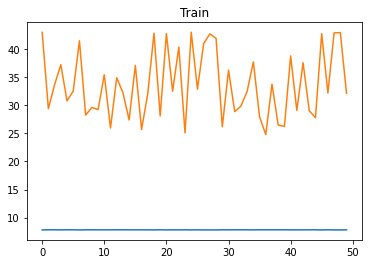

2/2 [==============================] - 3s 9ms/step


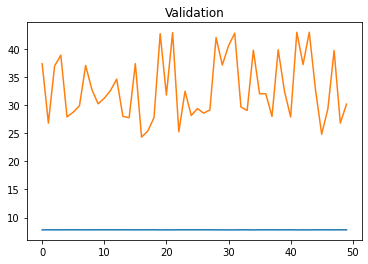

3/3 [==============================] - 1s 308ms/step


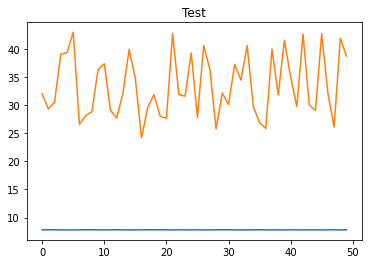

3/3 [==============================] - 0s 12ms/step


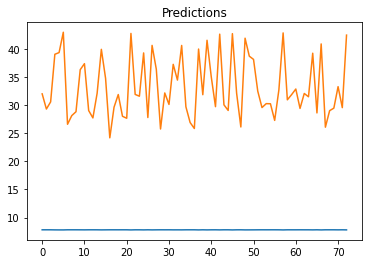

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_rnn_gru_mse

670.1423592690368

### CNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1043.8999 - root_mean_squared_error: 32.3094

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 44s 4s/step - loss: 1041.5133 - root_mean_squared_error: 32.2725 - val_loss: 1084.9974 - val_root_mean_squared_error: 32.9393
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1011.7098 - root_mean_squared_error: 31.8074

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1011.7098 - root_mean_squared_error: 31.8074 - val_loss: 1054.8960 - val_root_mean_squared_error: 32.4792
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 982.6833 - root_mean_squared_error: 31.3478

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 982.6833 - root_mean_squared_error: 31.3478 - val_loss: 1026.1996 - val_root_mean_squared_error: 32.0344
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 953.5142 - root_mean_squared_error: 30.8790

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 955.3333 - root_mean_squared_error: 30.9085 - val_loss: 999.0690 - val_root_mean_squared_error: 31.6081
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 933.3573 - root_mean_squared_error: 30.5509

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 929.5560 - root_mean_squared_error: 30.4886 - val_loss: 973.5024 - val_root_mean_squared_error: 31.2010
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 905.2980 - root_mean_squared_error: 30.0882

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 905.2980 - root_mean_squared_error: 30.0882 - val_loss: 949.4804 - val_root_mean_squared_error: 30.8136
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 882.3939 - root_mean_squared_error: 29.7051

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 882.3939 - root_mean_squared_error: 29.7051 - val_loss: 926.8782 - val_root_mean_squared_error: 30.4447
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 857.9317 - root_mean_squared_error: 29.2905

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 860.7679 - root_mean_squared_error: 29.3388 - val_loss: 905.3137 - val_root_mean_squared_error: 30.0884
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 840.2590 - root_mean_squared_error: 28.9872

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 4s/step - loss: 840.2590 - root_mean_squared_error: 28.9872 - val_loss: 884.7695 - val_root_mean_squared_error: 29.7451
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 821.9862 - root_mean_squared_error: 28.6703

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 820.7321 - root_mean_squared_error: 28.6484 - val_loss: 865.2307 - val_root_mean_squared_error: 29.4148
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 797.0259 - root_mean_squared_error: 28.2316

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 802.1628 - root_mean_squared_error: 28.3225 - val_loss: 846.7068 - val_root_mean_squared_error: 29.0982
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 784.6293 - root_mean_squared_error: 28.0112

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 784.6293 - root_mean_squared_error: 28.0112 - val_loss: 829.0262 - val_root_mean_squared_error: 28.7928
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 767.8282 - root_mean_squared_error: 27.7097

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 767.8282 - root_mean_squared_error: 27.7097 - val_loss: 812.3231 - val_root_mean_squared_error: 28.5013
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 757.3537 - root_mean_squared_error: 27.5201

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 752.0370 - root_mean_squared_error: 27.4233 - val_loss: 796.2905 - val_root_mean_squared_error: 28.2186
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 740.8704 - root_mean_squared_error: 27.2189

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 736.9259 - root_mean_squared_error: 27.1464 - val_loss: 780.9864 - val_root_mean_squared_error: 27.9461
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 722.5745 - root_mean_squared_error: 26.8807

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 722.3610 - root_mean_squared_error: 26.8768 - val_loss: 766.3377 - val_root_mean_squared_error: 27.6828
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 708.4783 - root_mean_squared_error: 26.6173

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 708.4783 - root_mean_squared_error: 26.6173 - val_loss: 752.2183 - val_root_mean_squared_error: 27.4266
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 695.1759 - root_mean_squared_error: 26.3662

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 695.1759 - root_mean_squared_error: 26.3662 - val_loss: 738.9624 - val_root_mean_squared_error: 27.1839
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 682.8693 - root_mean_squared_error: 26.1318

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 682.8693 - root_mean_squared_error: 26.1318 - val_loss: 727.0419 - val_root_mean_squared_error: 26.9637
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 672.0643 - root_mean_squared_error: 25.9242

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 672.0643 - root_mean_squared_error: 25.9242 - val_loss: 716.5822 - val_root_mean_squared_error: 26.7691
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 662.1273 - root_mean_squared_error: 25.7318

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 662.5048 - root_mean_squared_error: 25.7392 - val_loss: 707.3527 - val_root_mean_squared_error: 26.5961
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 644.8795 - root_mean_squared_error: 25.3945

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 654.0756 - root_mean_squared_error: 25.5749 - val_loss: 699.1122 - val_root_mean_squared_error: 26.4407
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 646.4816 - root_mean_squared_error: 25.4260

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 646.4816 - root_mean_squared_error: 25.4260 - val_loss: 691.6238 - val_root_mean_squared_error: 26.2987
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 639.5521 - root_mean_squared_error: 25.2894

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 639.5521 - root_mean_squared_error: 25.2894 - val_loss: 684.8672 - val_root_mean_squared_error: 26.1700
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 632.3711 - root_mean_squared_error: 25.1470

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 633.3377 - root_mean_squared_error: 25.1662 - val_loss: 678.6440 - val_root_mean_squared_error: 26.0508
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 622.6796 - root_mean_squared_error: 24.9535

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 627.5144 - root_mean_squared_error: 25.0502 - val_loss: 672.9390 - val_root_mean_squared_error: 25.9411
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 622.1976 - root_mean_squared_error: 24.9439

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 622.1976 - root_mean_squared_error: 24.9439 - val_loss: 667.6490 - val_root_mean_squared_error: 25.8389
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 617.2611 - root_mean_squared_error: 24.8447

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 617.2611 - root_mean_squared_error: 24.8447 - val_loss: 662.8156 - val_root_mean_squared_error: 25.7452
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 616.7982 - root_mean_squared_error: 24.8354

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 612.7795 - root_mean_squared_error: 24.7544 - val_loss: 658.3894 - val_root_mean_squared_error: 25.6591
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 608.6536 - root_mean_squared_error: 24.6709

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 608.6536 - root_mean_squared_error: 24.6709 - val_loss: 654.2650 - val_root_mean_squared_error: 25.5786
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 604.7848 - root_mean_squared_error: 24.5924

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 604.7848 - root_mean_squared_error: 24.5924 - val_loss: 650.3633 - val_root_mean_squared_error: 25.5022
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 601.1089 - root_mean_squared_error: 24.5175

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 601.1089 - root_mean_squared_error: 24.5175 - val_loss: 646.7092 - val_root_mean_squared_error: 25.4305
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 597.7178 - root_mean_squared_error: 24.4483

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 597.7178 - root_mean_squared_error: 24.4483 - val_loss: 643.3222 - val_root_mean_squared_error: 25.3638
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 594.5837 - root_mean_squared_error: 24.3841

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 594.5837 - root_mean_squared_error: 24.3841 - val_loss: 640.1701 - val_root_mean_squared_error: 25.3016
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 592.3698 - root_mean_squared_error: 24.3386

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 591.6516 - root_mean_squared_error: 24.3239 - val_loss: 637.2248 - val_root_mean_squared_error: 25.2433
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 590.7281 - root_mean_squared_error: 24.3049

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 588.9076 - root_mean_squared_error: 24.2674 - val_loss: 634.4654 - val_root_mean_squared_error: 25.1886
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 590.3605 - root_mean_squared_error: 24.2973

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 586.3177 - root_mean_squared_error: 24.2140 - val_loss: 631.8556 - val_root_mean_squared_error: 25.1367
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 583.8658 - root_mean_squared_error: 24.1633

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 583.8658 - root_mean_squared_error: 24.1633 - val_loss: 629.3646 - val_root_mean_squared_error: 25.0871
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 585.0139 - root_mean_squared_error: 24.1871

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 581.5025 - root_mean_squared_error: 24.1144 - val_loss: 626.9600 - val_root_mean_squared_error: 25.0392
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 579.3793 - root_mean_squared_error: 24.0703

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 579.2410 - root_mean_squared_error: 24.0674 - val_loss: 624.6424 - val_root_mean_squared_error: 24.9928
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 578.2562 - root_mean_squared_error: 24.0470

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 577.0441 - root_mean_squared_error: 24.0217 - val_loss: 622.3972 - val_root_mean_squared_error: 24.9479
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 574.9162 - root_mean_squared_error: 23.9774

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 574.9162 - root_mean_squared_error: 23.9774 - val_loss: 620.2197 - val_root_mean_squared_error: 24.9042
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 572.8504 - root_mean_squared_error: 23.9343

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 572.8504 - root_mean_squared_error: 23.9343 - val_loss: 618.0991 - val_root_mean_squared_error: 24.8616
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 570.8361 - root_mean_squared_error: 23.8922

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 570.8361 - root_mean_squared_error: 23.8922 - val_loss: 616.0344 - val_root_mean_squared_error: 24.8200
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 568.8735 - root_mean_squared_error: 23.8511

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 568.8735 - root_mean_squared_error: 23.8511 - val_loss: 614.0240 - val_root_mean_squared_error: 24.7795
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 565.6906 - root_mean_squared_error: 23.7843

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 566.9567 - root_mean_squared_error: 23.8109 - val_loss: 612.0703 - val_root_mean_squared_error: 24.7401
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 561.1473 - root_mean_squared_error: 23.6885

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 565.0888 - root_mean_squared_error: 23.7716 - val_loss: 610.1432 - val_root_mean_squared_error: 24.7011
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 563.2545 - root_mean_squared_error: 23.7330

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 563.2545 - root_mean_squared_error: 23.7330 - val_loss: 608.2390 - val_root_mean_squared_error: 24.6625
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 561.4457 - root_mean_squared_error: 23.6948

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 561.4457 - root_mean_squared_error: 23.6948 - val_loss: 606.3821 - val_root_mean_squared_error: 24.6248
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 559.6797 - root_mean_squared_error: 23.6576

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 3s 19ms/step


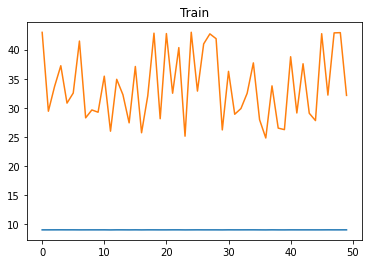

2/2 [==============================] - 2s 14ms/step


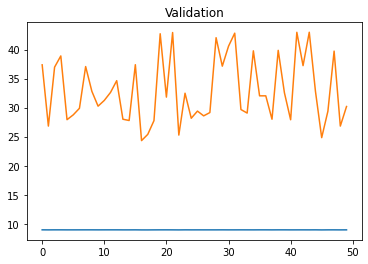

3/3 [==============================] - 0s 32ms/step


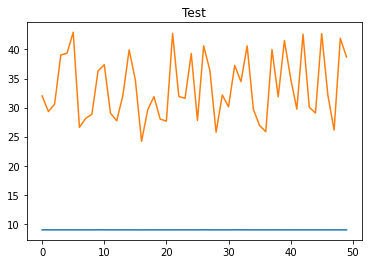

3/3 [==============================] - 0s 14ms/step


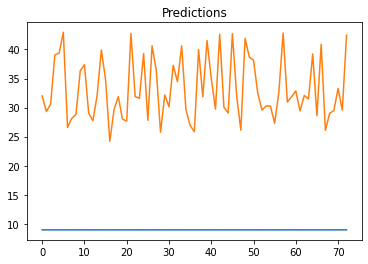

In [41]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [42]:
hybrid_cnn_gru_mse

614.3379592416491

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1166.1427 - root_mean_squared_error: 34.1488

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 5s/step - loss: 1166.1427 - root_mean_squared_error: 34.1488 - val_loss: 1200.5581 - val_root_mean_squared_error: 34.6491
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1115.3497 - root_mean_squared_error: 33.3969

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1114.3218 - root_mean_squared_error: 33.3815 - val_loss: 1147.4025 - val_root_mean_squared_error: 33.8733
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1064.0309 - root_mean_squared_error: 32.6195

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1064.0309 - root_mean_squared_error: 32.6195 - val_loss: 1097.4556 - val_root_mean_squared_error: 33.1279
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1016.9672 - root_mean_squared_error: 31.8899

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1016.9672 - root_mean_squared_error: 31.8899 - val_loss: 1050.6157 - val_root_mean_squared_error: 32.4132
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 972.4196 - root_mean_squared_error: 31.1836

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 972.4196 - root_mean_squared_error: 31.1836 - val_loss: 1005.7632 - val_root_mean_squared_error: 31.7138
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 929.3413 - root_mean_squared_error: 30.4851

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 929.3413 - root_mean_squared_error: 30.4851 - val_loss: 962.2526 - val_root_mean_squared_error: 31.0202
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 887.6955 - root_mean_squared_error: 29.7942

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 887.6955 - root_mean_squared_error: 29.7942 - val_loss: 919.4247 - val_root_mean_squared_error: 30.3220
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 845.5447 - root_mean_squared_error: 29.0783

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 846.5779 - root_mean_squared_error: 29.0960 - val_loss: 877.7477 - val_root_mean_squared_error: 29.6268
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 807.2039 - root_mean_squared_error: 28.4113

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 807.2039 - root_mean_squared_error: 28.4113 - val_loss: 838.8865 - val_root_mean_squared_error: 28.9635
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 771.2048 - root_mean_squared_error: 27.7706

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 771.2048 - root_mean_squared_error: 27.7706 - val_loss: 804.2274 - val_root_mean_squared_error: 28.3589
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 739.2052 - root_mean_squared_error: 27.1883

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 739.2052 - root_mean_squared_error: 27.1883 - val_loss: 773.7782 - val_root_mean_squared_error: 27.8169
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 712.5177 - root_mean_squared_error: 26.6930

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 711.0443 - root_mean_squared_error: 26.6654 - val_loss: 746.6066 - val_root_mean_squared_error: 27.3241
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 685.3370 - root_mean_squared_error: 26.1789

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 685.3370 - root_mean_squared_error: 26.1789 - val_loss: 720.6880 - val_root_mean_squared_error: 26.8456
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 660.5405 - root_mean_squared_error: 25.7010

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 660.5405 - root_mean_squared_error: 25.7010 - val_loss: 695.1405 - val_root_mean_squared_error: 26.3655
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 636.2842 - root_mean_squared_error: 25.2247

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 636.2842 - root_mean_squared_error: 25.2247 - val_loss: 670.5428 - val_root_mean_squared_error: 25.8948
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 614.3538 - root_mean_squared_error: 24.7862

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedfBODC.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")